## Yield Predictions for German Offshore Tenders 2024 Project Overview
### Python Programming in Energy Science II - Group 5
---
- [PDF Instructions](./data/PPES-SoSe2024_StudentProject.pdf)
- [Github Repository](https://github.com/boujuan/StudentProject-Yield-Predictions-Offshore)

**AUTHORS:**
- [Jiah Ryu](mailto:jiah.ryu@uni-oldenburg.de)
- [Julia Guimaraes Zimmer](mailto:julia.guimaraes.zimmer@uni-oldenburg.de)
- [Pascal Pflüger](mailto:pascal.pflueger@uni-oldenburg.de)
- [Juan Manuel Boullosa Novo](mailto:juan.manuel.boullosa.novo@uni-oldenburg.de)

**DATA:**
- Floating Lidar Measurements from two positions = `'data/measurements/*.nc'`
- Long-term reference model data (ERA5): 1990-2023 = `'data/reanalysis/*.csv'`
- Turbine coordinates of existing wind farms = `'data/turbine-info/coordinates/existing/*.csv'`
- Turbine coordinates of planned wind farms = `'data/turbine-info/coordinates/planned_future/*.csv'`
- Turbine coordinates in operation before 2023 = `'data/turbine-info/coordinates/planned_in_operation_before_2030/*.csv'`
- Turbine coordinates planned in Netherlands = `'data/turbine-info/coordinates/planned_netherlands/*.csv'`
- Geometric turbine coordinates for the areas of interest N-9.1/N-9.2/N-9.3 (not optimized – see Task 12) = `'data/turbine-info/coordinates/area_of_interest/*.csv'`
- Shapefiles of wind farm areas, the countries Denmark, Germany and the Netherlands = `'data/shapefiles/.../*'`
- Thrust and power curves of wind turbines = `'data/turbine-info/power_curves/*.csv'`

---

**TASKS:**
To estimate the short-term wind climate of the three areas of interest, we first look at the planned area. Furthermore, we explore the structure given in the NC files and choose the data we need for further analytics:

   **JUAN:**
   
1. Import libraries, set up file paths, and open datasets
2. Set turbine design:
   - Hub height
   - Rotor diameter
   - Model, etc.
3. Plot the field of interest together with the lidar measurement buoy positions
4. Explore the structure and variables inside the NC files
5. Decide which data to use for further analytics
6. Select variables of interest
7. Create a dataframe out of them
8. Check for data gaps, NaN values, and duplicated data
9. Filter incorrect data points
10. Select data for only one year, so that buoy 2 and buoy 6 have the same length
11. Interpolate both buoy datasets, with the 140 m and 200 m to hub height of 150 m
12. Create a new dataframe for the interpolated data
13. Export it to a CSV file for further use
14. Compare Buoy 2 and 6 to ensure that the data processing didn’t go wrong
15. Plot time series of the wind speed for both met masts
16. Calculate the monthly and annual wind statistics for the windspeed and the wind direction for both met masts 
17. Calculate the monthly and annual wind statistics for the wind speed and the wind direction for both buoys
18. Plot the monthly mean wind speed and wind direction for both buoys
19. Plot the diurnal wind speed and wind direction for both buoys
20. Plot wind roses for both buoys 
21. Plot a Weibull distribution of the windspeed 
22. Calculate the annual Power Production of one Turbine, one field and the entire farm 
23. Plot a power curve
    
    **JIAH:**

24. Explore ERA5 Data
25. Comparison of measurement data with ERA5 data
26. **[TASK 3]** Long-term correction of the measurement data - MCP using Linear Regression
27. Long Term Wind Climate - Data Loading
28. Calculate the monthly and annual wind statistics for the wind speed and the wind direction for both buoys
29. Plot the monthly mean wind speed and wind direction for B6
30. Group the data into hours of the day and calculate the mean wind speed and wind direction for each hour of the day
31. Plot the diurnal wind speed and wind direction for both buoys
32. Plot wind roses for both buoys
33. Plot a Weibull distribution of the wind speed
34. Calculate the annual power production of one turbine, one field, and the entire farm
35. Plot a power curve
    
    **PASCAL:**

36. **[TASK 5]** Generation a geometric layout
37. Plot all optimized Areas in one figure
38. **[TASK 6]** Calculate the yield of the areas N-9.1, N-9.2, N-9.3 without external effects. Use the long-term corrected ERA5 data as input. 
39. Compute Power for gem. Layout without external wake effects 
40. **[TASK 7]** Use 3 other wake models to calculate the farm yield
    
    **JULIA:**

41. **[TASK 8]** Calculate Farm Yield with internal and external wake effects 
42. **[TASK 9]** How much percentage and TWh do we lose due:
43. **[TASK 10]** Calculate the yield of the single areas N-9.1, N-9.2, N-9.3 without external effects.
44. Compute Power for N9-1 - 3 separately

The correlation should be really good, since buoy 2 consists of data corrected with data from buoy 6. So this is also a test if the steps before are done well. If the correlation is not high (r^2 ~ 0.9), then this is a sign that something went wrong in the steps before. 

**REMARK:** From the 01_Data_and_Windfield_Overview.ipynb we decided to work with: buoy_6_measured and buoy_2_correlated_with_6 because buoy 2 had a lot of data gaps (not a complete year measured).

---

#### Booleans to decide what to plot/compute:

In [77]:
do_all = 1 # set TRUE to calculate and plot every function

booleans = {
    'check_environment': 0,
    'plot_wind_farm_data': 0,
    'plot_wind_farm_data_zoomed': 0,
    'netcdf_explore': 0,
    'plot_buoy_data': 1,
    'data_analysis': 1,
    'interpolate': 1,
    'plot_regression': 1,
    'plot_interpolation': 1,
    'short_term_analysis': 1,
    'plot_short_term': 1,
    'plot_windrose': 1,
    'calculate_AEP': 1,
    'plot_weibull': 1,
    'plot_power_curve': 1,
    'era5_analyze': 1,
    'longterm_correct': 1,
    'longterm_analysis': 1,
    'longterm_AEP': 1,
    'geo_foxes_layout': 1,
    'foxes_analyze': 1,
    'no_ext_wake_layout_power_foxes_1': 0,
    'no_ext_wake_layout_power_foxes_2': 0,
    'no_ext_wake_layout_power_foxes_3': 0,
    'ext_wake_farm_yield': 0,
    'separate_foxes_layouts': 0,
    'combined_cluster': 0
}

globals().update({b: 1 if do_all else v for b, v in booleans.items()})

#### Libraries Import:

In [78]:
if check_environment:
    from checkenv_requirements import check_and_install_packages
    packages_to_check = ['numpy', 'pandas', 'netCDF4', 'matplotlib', 'cartopy']

In [107]:

# Custom libraries
import data_loading
import plotting
import netcdf_exploration
import data_analysis
import interpolation
import era5_analysis
import longterm
import geo_layout
import foxes_analysis

import glob
import pandas as pd
import geopandas as gpd
import numpy as np
import os

#### File Paths:

In [80]:
# Base paths
measurements_path = 'data/measurements/'
turbine_info_path = 'data/turbine-info/coordinates/'
turbine_power_curves_path = 'data/turbine-info/power_curves/'
shapefiles_path = 'data/shapefiles/'
era5_path = 'data/reanalysis/'

# Buoy NetCDF files
bouy6_path = f'{measurements_path}2023-11-06_Buoy6_BSH_N-9.nc'
bouy2_path = f'{measurements_path}2023-11-09_Buoy2_BSH_N-9.nc'

# Windfarm layout base paths
turbines_existing_path = f'{turbine_info_path}existing/'
turbines_planned_future_path = f'{turbine_info_path}planned_future/'
turbines_planned_in_operation_before_2030_path = f'{turbine_info_path}planned_in_operation_before_2030/'
turbines_planned_netherlands_path = f'{turbine_info_path}planned_netherlands/'
turbines_area_of_interest_path = f'{turbine_info_path}area_of_interest/'

# Countries Shapefiles paths
shapefiles_DEU_path = f'{shapefiles_path}DEU/DEU_adm1.shp'
shapefiles_DNK_path = f'{shapefiles_path}DNK/gadm36_DNK_1.shp'
shapefiles_NLD_path = f'{shapefiles_path}NLD/gadm36_NLD_1.shp'

# Wind field layout files
file_N9_1 = f'{turbines_area_of_interest_path}layout-N-9.1.geom.csv'
file_N9_2 = f'{turbines_area_of_interest_path}layout-N-9.2.geom.csv'
file_N9_3 = f'{turbines_area_of_interest_path}layout-N-9.3.geom.csv'

# Existing turbines
existing_files = glob.glob(f'{turbines_existing_path}*.csv')
# Planned future turbines
planned_future_files = glob.glob(f'{turbines_planned_future_path}*.csv')
# Turbines planned to be in operation before 2030
planned_before_2030_files = glob.glob(f'{turbines_planned_in_operation_before_2030_path}*.csv')
# Planned turbines in the Netherlands
planned_netherlands_files = glob.glob(f'{turbines_planned_netherlands_path}*.csv')

turbine_power_curve_path = f'{turbine_power_curves_path}IEA-15MW-D240-H150.csv'
site_shp = gpd.read_file(f'{shapefiles_path}FEP2024_PreDraft/site.shp')

#### 1. Data Loading:

In [81]:
# Load NetCDF buoy datasets
xrbuoy6, xrbuoy2, buoy2_file, buoy6_file = data_loading.datasets(bouy6_path, bouy2_path)

# Load Wind field layout CSV data
data_N9_1, data_N9_2, data_N9_3 = data_loading.csv_files(file_N9_1, file_N9_2, file_N9_3)

# Load other windfarm data
existing_data = data_loading.other_windfarm_data(existing_files)
planned_future_data = data_loading.other_windfarm_data(planned_future_files)
planned_before_2030_data = data_loading.other_windfarm_data(planned_before_2030_files)
planned_netherlands_data = data_loading.other_windfarm_data(planned_netherlands_files)

other_wind_farm_data = existing_data + planned_future_data + planned_before_2030_data + planned_netherlands_data

#### 2. Set the Turbine Design: 
- International Energy Agency (IEA) for a 15 MW offshore wind turbine
- Turbine name: IEA-15MW-D240-H150
-rotor diameter:  240 meters
- hub height: 150 meters

With that we say the height of interest is the one, nearest on the hub height: 140 m 


#### 3. Plot the field of interest together with the lidar measurement buoy positions:

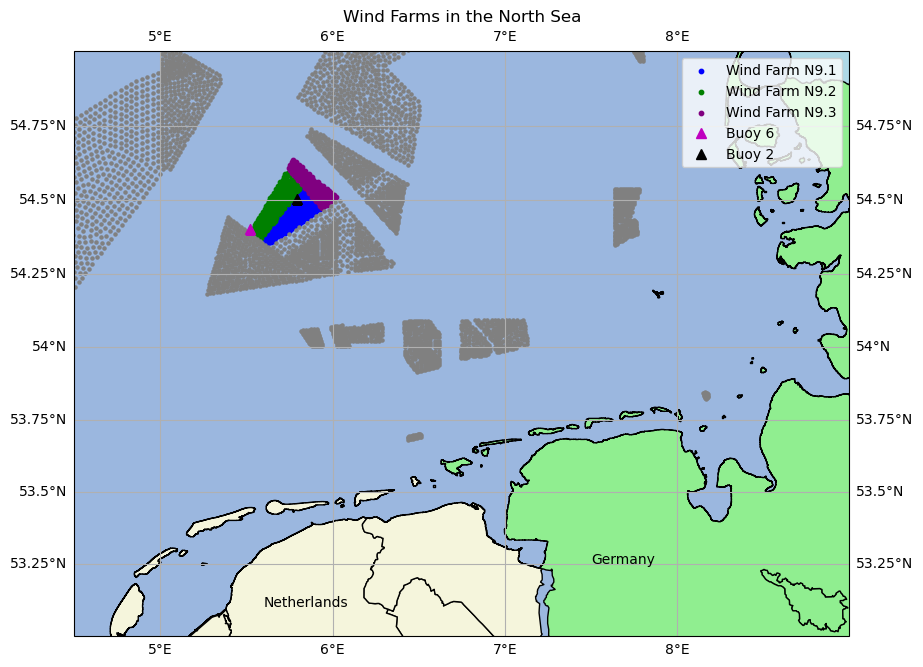

In [82]:
if plot_wind_farm_data:
    plotting.plot_wind_farms_and_buoys(shapefiles_path, data_N9_1, data_N9_2, data_N9_3, other_wind_farm_data)

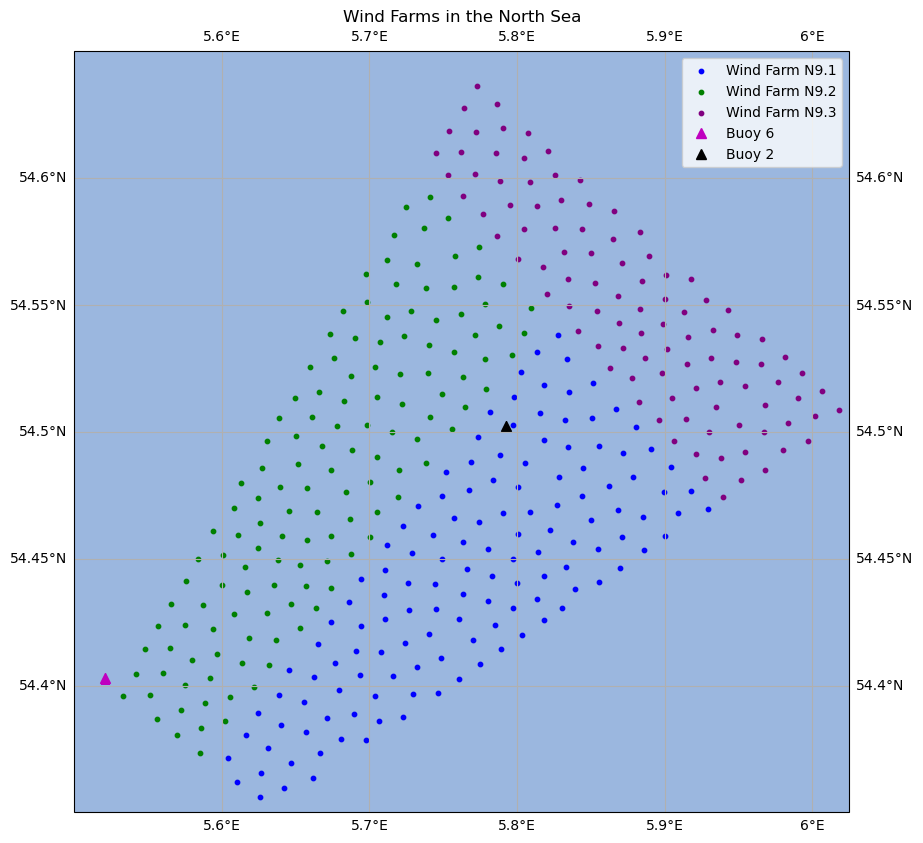

In [83]:
if plot_wind_farm_data_zoomed:
    plotting.plot_wind_farms_and_buoys_zoomed(data_N9_1, data_N9_2, data_N9_3)

#### 4. Explore the structure and variables inside the  2 netcdf files:

In [84]:
if netcdf_explore:
    netcdf_exploration.overview(buoy2_file)

TopGroup Nr. 1: ZX_LIDAR_WLBZ_2
TopGroup Nr. 2: METEO_WLBZ_2
TopGroup Nr. 3: ADD_DATA_WLBZ_2
TopGroup Nr. 4: ZX_LIDAR_WLBZ_6_MCP
TopGroup Nr. 5: METEO_WLBZ_6_MCP
---------------------------------------------------------
TopGroup: ZX_LIDAR_WLBZ_2
    Groupvariable: wind_speed
    Groupvariable: wind_from_direction
    Groupvariable: wind_from_direction_availability
    Groupvariable: wind_speed_availability
    Groupvariable: wind_speed_min
    Groupvariable: wind_speed_max
    Groupvariable: wind_speed_stddev
    Groupvariable: wind_count
    Groupvariable: turbulence_intensity
    Groupvariable: algorithm_bitmask
TopGroup: METEO_WLBZ_2
        Subgroup: Vaisala Weather Station
            SubGroupVariable: rain_accumulation
            SubGroupVariable: rain_accumulation_calculated
            SubGroupVariable: rain_duration
            SubGroupVariable: rain_intensity
            SubGroupVariable: hail_accumulation
            SubGroupVariable: hail_duration
            SubGroupVaria

In [85]:
if netcdf_explore:
    netcdf_exploration.topgroup_variables(buoy2_file,'ZX_LIDAR_WLBZ_2')

Variable Name: wind_speed
Variable Attributes:
    Units: m/s
    Long Name: Wind speed
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_from_direction
Variable Attributes:
    Units: degree
    Long Name: Horizontal wind direction
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_from_direction_availability
Variable Attributes:
    Units: percent
    Long Name: Availability of the horizontal wind direction
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_speed_availability
Variable Attributes:
    Units: percent
    Long Name: Availability of the horizontal wind speed
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_speed_min
Variable Attributes:
    Units: m/s
    Long Name: Minimum wind speed
    Shape: (67680, 1, 1, 6)
----------------------------------------

In [86]:
if netcdf_explore:
    netcdf_exploration.topgroup_variables(buoy2_file, 'ZX_LIDAR_WLBZ_6_MCP')

Variable Name: wind_from_direction
Variable Attributes:
    Units: degree
    Long Name: Measure correlate predict corrected wind direction data from dataset ZX_LIDAR_WLBZ_6 measured by WLBZ_6.
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------
Variable Name: wind_speed
Variable Attributes:
    Units: m/s
    Long Name: Measure correlate predict corrected wind speed data from dataset ZX_LIDAR_WLBZ_6 measured by WLBZ_6).
    Shape: (67680, 1, 1, 6)
---------------------------------------------------------


In [87]:
if netcdf_explore:
    netcdf_exploration.sub_groups(buoy2_file, 'METEO_WLBZ_2')

SUBGROUP: Vaisala Weather Station
Variable Name: rain_accumulation
Variable Attributes:
    Units: mm
    Long Name: Rain accumulation measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
---------------------------------------------------------
Variable Name: rain_accumulation_calculated
Variable Attributes:
    Units: mm
    Long Name: Rain accumulation calculated from rain duration and rain intensity data provided by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
---------------------------------------------------------
Variable Name: rain_duration
Variable Attributes:
    Units: s
    Long Name: Rain duration measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
---------------------------------------------------------
Variable Name: rain_intensity
Variable Attributes:
    Units: mm/h
    Long Name: Rain intensity measured by the Vaisala Weather Station at 3 m above MSL
    Shape: (67680, 1, 1)
--------

#### 5. Decide which Data we use for further analytics:

In [88]:
# Set variables from netcdf files
time2 = xrbuoy2.variables['time'][:]
windspeed_mcp_buoy2 = buoy2_file.groups['ZX_LIDAR_WLBZ_6_MCP'].variables['wind_speed'][:]
windspeed2 = buoy2_file.groups['ZX_LIDAR_WLBZ_2'].variables['wind_speed'][:]

time6 = xrbuoy6.variables['time'][:]
windspeed_mcp_buoy6 = buoy6_file.groups['ZX_LIDAR_WLBZ_2_MCP'].variables['wind_speed'][:]
windspeed6 = buoy6_file.groups['ZX_LIDAR_WLBZ_6'].variables['wind_speed'][:]

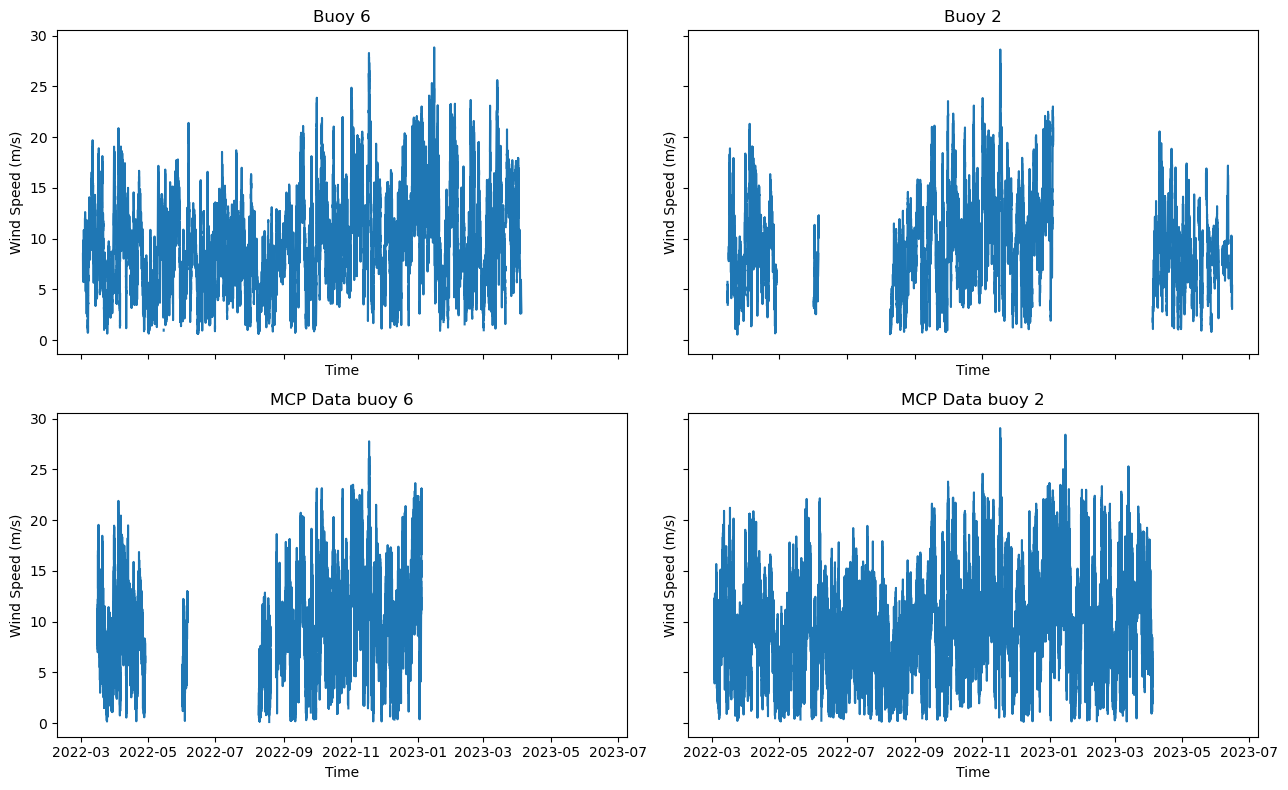

In [89]:
if plot_buoy_data:
    plotting.plot_buoy_data(time2, windspeed2, time6, windspeed6, windspeed_mcp_buoy2, windspeed_mcp_buoy6)

Looking at the data availability, only Buoy 6 and Buoy2-MCP data are considered for further steps.

#### 6. Select variables of interest
- heights for buoy 6: 14 42 94 140 200 250
- indices for the heights: 0 1 2 3 4 5 

In future we gonna work only with the height measurements of 140 and 200 meters to interpolate 
these two heights to the hub height of 150 meter.
This is why we only convert windspeeds[:, 0, 0, 3] and winddirection_buoy_2[:, 0, 0, 3] for example.
Because these indicies stand for the two heights of interest.

#### 7. Create a dataframe out of the variables of interest

In [90]:
# select the data of interest for now
time2 = xrbuoy2.variables['time'][:]
windspeed2 = buoy2_file.groups['ZX_LIDAR_WLBZ_6_MCP'].variables['wind_speed'][:]
winddirection_buoy_2 = buoy2_file.groups['ZX_LIDAR_WLBZ_6_MCP'].variables['wind_from_direction'][:]
time6 = xrbuoy6.variables['time'][:]
windspeed6 = buoy6_file.groups['ZX_LIDAR_WLBZ_6'].variables['wind_speed'][:]
winddirection_buoy_6 = buoy6_file.groups['ZX_LIDAR_WLBZ_6'].variables['wind_from_direction'][:]

In [91]:
if data_analysis:
    df_buoy_2 = data_loading.create_buoy_dataframes(
        time2,
        windspeed2[:, 0, 0, 3],
        winddirection_buoy_2[:, 0, 0, 3],
        windspeed2[:, 0, 0, 4],
        winddirection_buoy_2[:, 0, 0, 4]
    )

    df_buoy_6 = data_loading.create_buoy_dataframes(
        time6,
        windspeed6[:, 0, 0, 3],
        winddirection_buoy_6[:, 0, 0, 3],
        windspeed6[:, 0, 0, 4],
        winddirection_buoy_6[:, 0, 0, 4]
    )

    #close the files! 
    buoy6_file.close()
    buoy2_file.close() 

#### 8. Check for data gaps, NaN values, and duplicated data

In [92]:
#This looks for duplicates and NaN values at the same time!
if data_analysis:
    data_analysis.explore_and_prefilter_df(df_buoy_2)

Data Availability is 81.25%
Missing time periods are:
DatetimeIndex(['2022-03-07 08:40:00', '2022-03-07 08:50:00',
               '2022-03-07 12:00:00', '2022-03-07 16:00:00',
               '2022-03-07 16:10:00', '2022-03-07 16:20:00',
               '2022-03-07 16:50:00', '2022-03-07 18:10:00',
               '2022-03-14 06:10:00', '2022-03-14 09:10:00',
               ...
               '2023-06-15 22:20:00', '2023-06-15 22:30:00',
               '2023-06-15 22:40:00', '2023-06-15 22:50:00',
               '2023-06-15 23:00:00', '2023-06-15 23:10:00',
               '2023-06-15 23:20:00', '2023-06-15 23:30:00',
               '2023-06-15 23:40:00', '2023-06-15 23:50:00'],
              dtype='datetime64[ns]', length=12691, freq=None)
Data Availability is 82.22%
                     wind_speed_140m  wind_direction_140m  wind_speed_200m  \
time                                                                         
2022-03-07 08:50:00              NaN                  NaN            

#### 9. Filter incorrect data points
#### 10. Select data for only one year, so that buoy 2 and buoy 6 have the same length

In [93]:
if data_analysis:
    filtered_buoy2 = data_analysis.replace_nan_and_select_1yr(df_buoy_2) #NaN values are forward filled

In [94]:
if data_analysis:
    data_analysis.explore_and_prefilter_df(df_buoy_6)
    filtered_buoy6 = data_analysis.replace_nan_and_select_1yr(df_buoy_6)

Data Availability is 96.39%
Missing time periods are:
DatetimeIndex(['2022-03-07 08:40:00', '2022-03-07 08:50:00',
               '2022-03-14 06:10:00', '2022-03-14 09:10:00',
               '2022-03-14 09:20:00', '2022-03-14 09:30:00',
               '2022-03-14 09:40:00', '2022-03-14 09:50:00',
               '2022-03-14 10:00:00', '2022-03-14 10:10:00',
               ...
               '2023-04-01 03:20:00', '2023-04-01 03:30:00',
               '2023-04-01 03:40:00', '2023-04-01 03:50:00',
               '2023-04-01 04:00:00', '2023-04-01 04:10:00',
               '2023-04-01 04:20:00', '2023-04-01 04:30:00',
               '2023-04-01 04:40:00', '2023-04-04 01:20:00'],
              dtype='datetime64[ns]', length=2066, freq=None)
Data Availability is 97.32%
                     wind_speed_140m  wind_direction_140m  wind_speed_200m  \
time                                                                         
2022-03-07 08:50:00              NaN                  NaN             

#### 11. Interpolate

We use the filtered data to do a linear interpolation to the selected hub height of 150 m. We choose linear interpolation because the wind climate normally behaves exponential with the height. At our interpolation height (140 m - 200 m) we are pretty high, so we assume a linear relationship between these points, with a high  gradient. 

#### 12. Create a new dataframe for the interpolated data

In [95]:
if interpolate:
    ws6_150m = interpolation.interpolate_arrays(filtered_buoy6['wind_speed_140m'], filtered_buoy6['wind_speed_200m'], 140, 200, 150)
    wd6_150m = interpolation.interpolate_arrays(filtered_buoy6['wind_direction_140m'], filtered_buoy6['wind_direction_200m'], 140, 200, 150)
    ws2_150m = interpolation.interpolate_arrays(filtered_buoy2['wind_speed_140m'], filtered_buoy2['wind_speed_200m'], 140, 200, 150)
    wd2_150m = interpolation.interpolate_arrays(filtered_buoy2['wind_direction_140m'], filtered_buoy2['wind_direction_200m'], 140, 200, 150)

    df_interpol_height = pd.DataFrame({
        'ws6_150m': ws6_150m,
        'wd6_150m': wd6_150m,
        'ws2_150m': ws2_150m,
        'wd2_150m': wd2_150m
    })

### 13. Export to csv for the: 03_Short_Term_Wind_Climate

In [96]:
if interpolate:
    df_interpol_height.to_csv('interpolated_ws_and_wd_for_150_m.csv', index=True)
    interpolated_csv_path = 'interpolated_ws_and_wd_for_150_m.csv'
    df_interpol_height

#### 14. Compare Buoy 2 and 6 to ensure that the data processing didn’t go wrong
- R2=1: This indicates a perfect fit, meaning that the regression line explains 100% of the variance in the dependent variable.
- 0.9≤R^2<1: Indicates an excellent fit, suggesting that the model explains a very high proportion of the variance.
- 0.7≤R^2<0.9: Indicates a good fit, suggesting that the model explains a substantial proportion of the variance.
- 0.5≤R^2<0.7: Indicates a moderate fit, meaning the model explains a reasonable amount of the variance, but there is still significant unexplained variance.
- R^2<0.5: Indicates a poor fit, suggesting that the model does not explain much of the variance in the dependent variable.

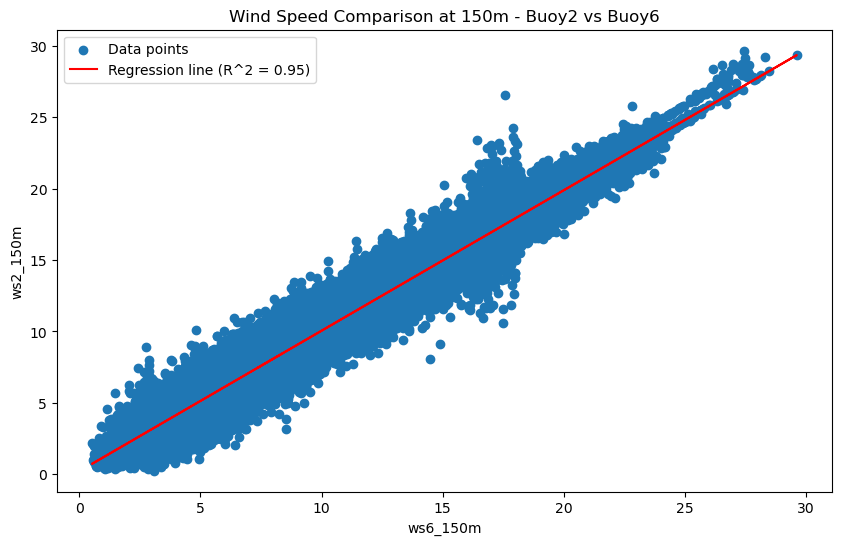

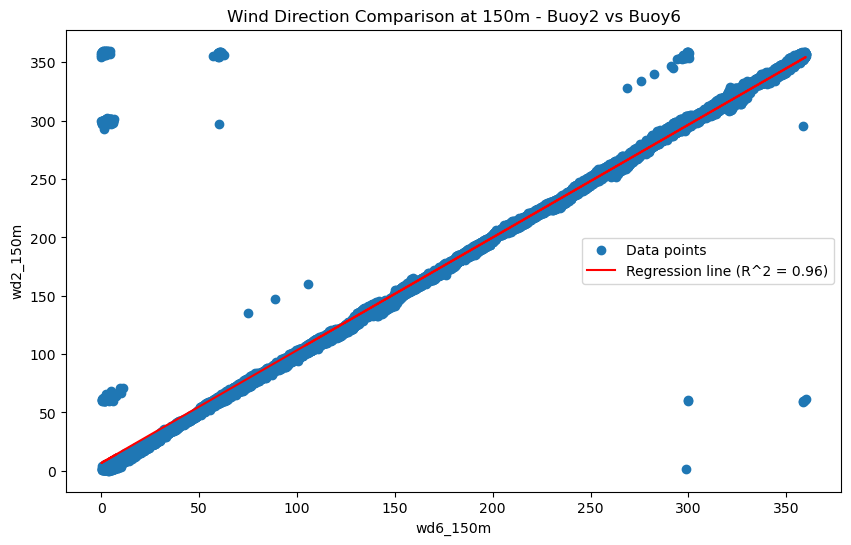

In [97]:
if plot_regression:
    # Scatter plot for wind speed for 52560 intervall points = one year 
    plotting.plot_scatter_with_regression(df_interpol_height['ws6_150m'], df_interpol_height['ws2_150m'], 'ws6_150m', 'ws2_150m', 'Wind Speed Comparison at 150m - Buoy2 vs Buoy6') 
    # Scatter plot for wind direction
    plotting.plot_scatter_with_regression(df_interpol_height['wd6_150m'], df_interpol_height['wd2_150m'], 'wd6_150m', 'wd2_150m', 'Wind Direction Comparison at 150m - Buoy2 vs Buoy6')

#### 15. Plot time series of the wind speed for both met masts

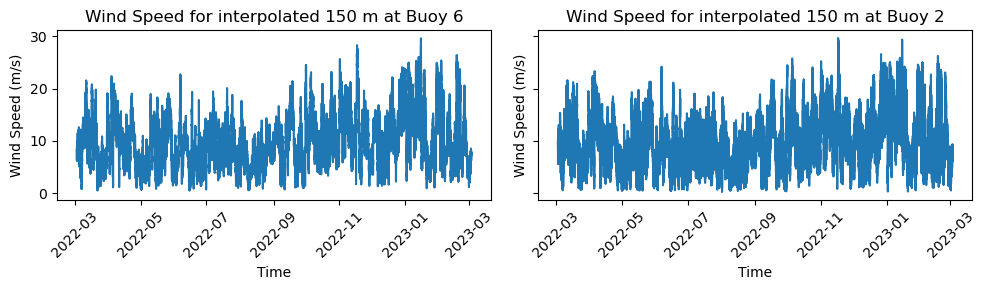

In [98]:
if plot_interpolation:
    plotting.plot_interpolated_wind_speeds(filtered_buoy6, filtered_buoy2, ws6_150m, ws2_150m)

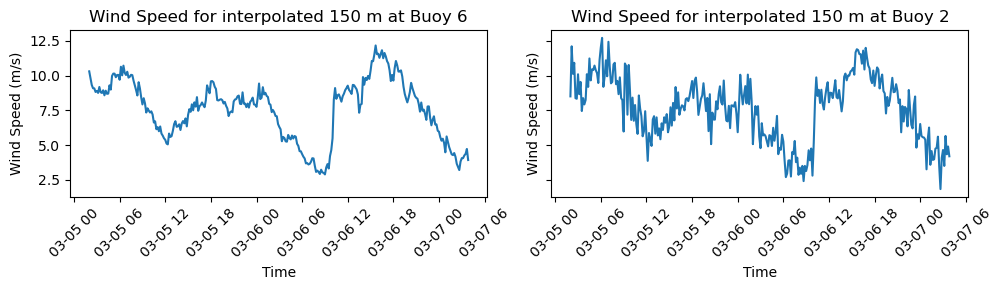

In [99]:
if plot_interpolation:
    plotting.plot_interpolated_wind_speeds(filtered_buoy6, filtered_buoy2, ws6_150m, ws2_150m, 300, 600)

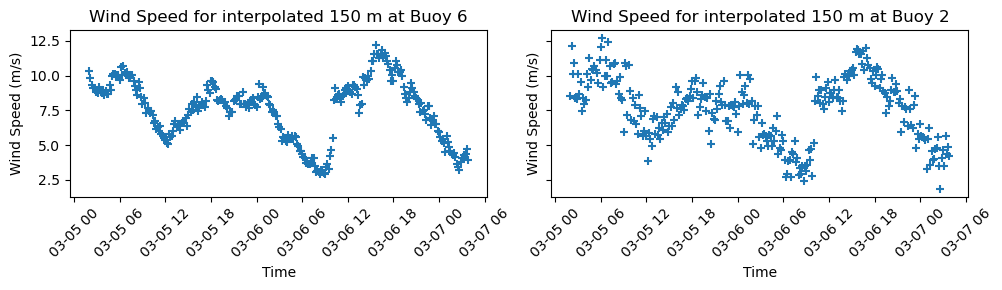

In [100]:
if plot_interpolation:
    plotting.plot_interpolated_wind_speeds(filtered_buoy6, filtered_buoy2, ws6_150m, ws2_150m, 300, 600, '+')

##### Considering the above results, we decided to continue further steps with Buoy 6 data.

#### 16. Calculate turbines number per field, load data paths into a pandas DataFrame

In [102]:
if short_term_analysis:
    #number of turbines per field
    turbines_N9_1 = len(pd.read_csv(file_N9_1))
    turbines_N9_2 = len(pd.read_csv(file_N9_2))
    turbines_N9_3 = len(pd.read_csv(file_N9_3))

    df_B6B2 = data_loading.read_LT_data_to_df(interpolated_csv_path)

#### 17. Calculate the monthly and annual wind statistics for the wind speed and the wind direction for buoy 6

In [103]:
if short_term_analysis:
    df_month_mean_B6B2 = data_analysis.group_month_and_calc_mean(df_B6B2)
df_month_mean_B6B2    

ws6_150m    wd6_150m   ws2_150m    wd2_150m
month                                              
1      12.861403  218.865998  12.831921  218.519906
2      10.322480  222.743084  10.366929  223.273421
3       8.783668  152.128842   8.820565  152.973199
4       9.939848  179.675142   9.971519  180.831131
5       8.379803  223.178023   8.501320  223.006335
6       7.678647  205.187182   7.805376  204.136472
7       8.932990  248.587441   9.028923  247.170144
8       7.005765  188.558412   7.147563  189.328175
9       9.256748  197.235187   9.406622  197.873261
10     11.091039  222.083776  11.114686  220.657748
11     12.562584  177.422923  12.532937  175.802359
12     11.532072  198.511408  11.527749  197.689992

In [105]:
if short_term_analysis:
    data_analysis.calc_yearly_statistics(df_B6B2['ws6_150m'], df_B6B2['wd6_150m'])

Yearly Mean of Wind Speed: 9.86, Standard Deviation: 4.87
Yearly Mean of Wind Direction: 202.83, Standard Deviation: 93.35


#### 18. Plot the monthly mean wind speed and wind direction for buoy 6

2024-06-25 22:08:51,390 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-25 22:08:51,394 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-25 22:08:51,496 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-25 22:08:51,506 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


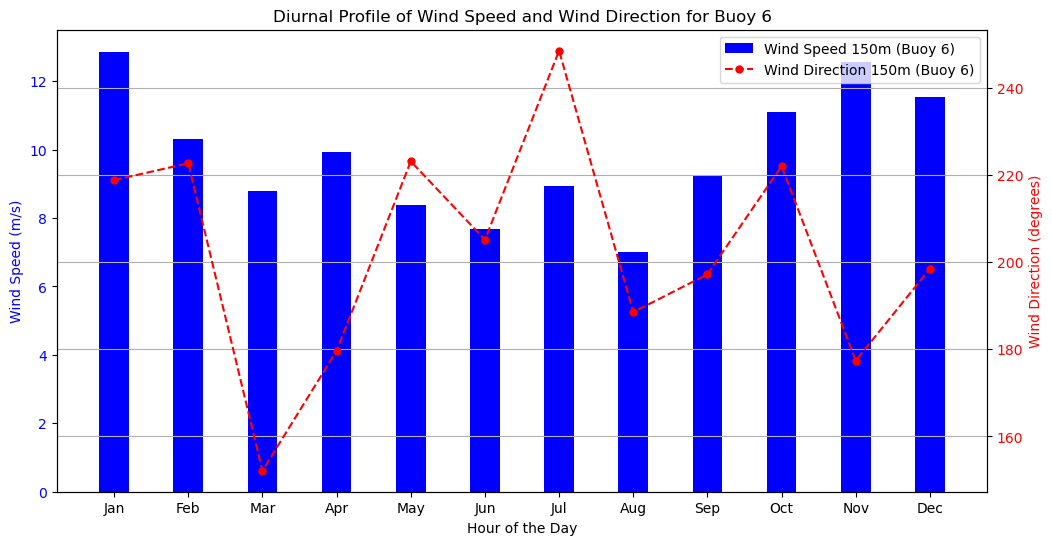

In [108]:
if plot_short_term:
    plotting.plot_histogram_mounthly_mean(df_month_mean_B6B2['ws6_150m'], df_month_mean_B6B2['wd6_150m'])

#### 19. Plot the diurnal wind speed and wind direction for buoy 6

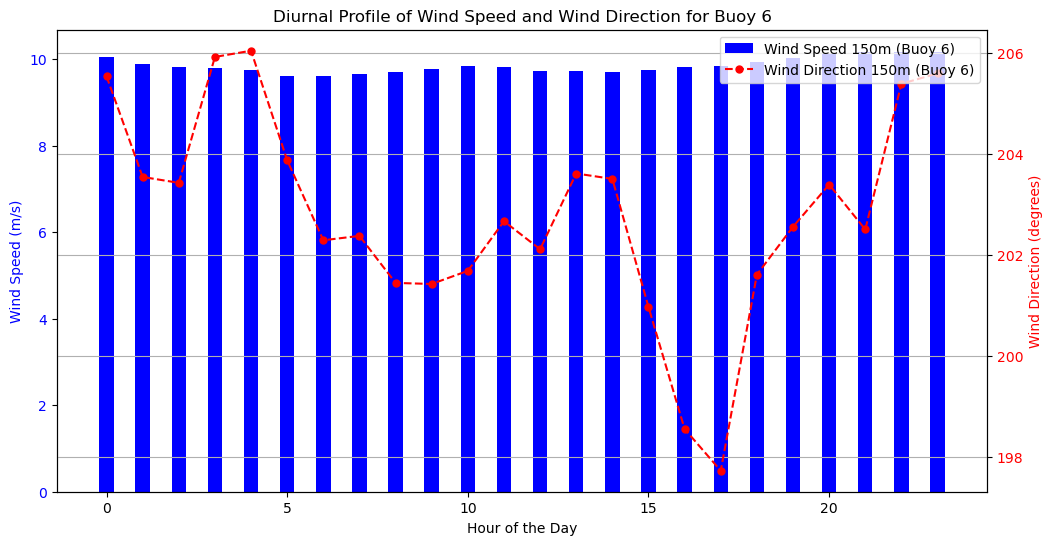

In [29]:
if plot_short_term:
    diurnal_B6B2_df = data_analysis.calc_diurnal_wsand_wd(df_B6B2)
    plotting.plot_diurnal_ws_and_wd(diurnal_B6B2_df.index,  diurnal_B6B2_df['ws6_150m'], diurnal_B6B2_df['wd6_150m'])

#### 20. Plot wind roses for buoy 6

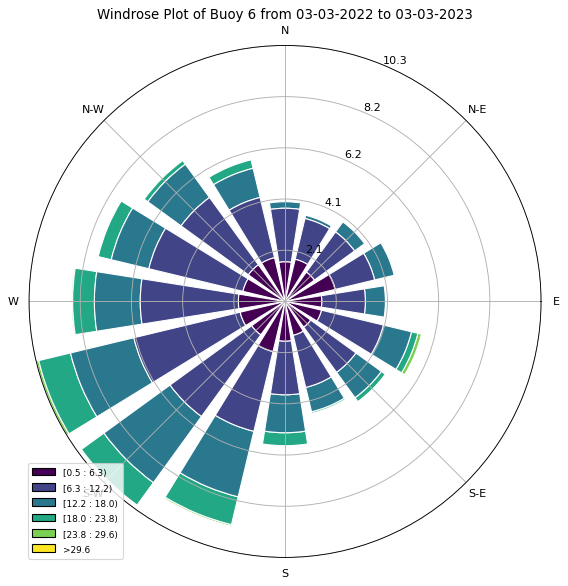

In [109]:
if plot_windrose:
    plotting.plot_wind_rose(df_B6B2['wd6_150m'], df_B6B2['ws6_150m'], 'Windrose Plot of Buoy 6 from 03-03-2022 to 03-03-2023' )

#### 21. Plot a Weibull distribution of the wind speed

- weibull_min.fit(ws_data, floc=0): This part of the code fits a Weibull distribution to the wind speed data (ws_data). The fit method of the weibull_min distribution estimates the shape, location, and scale parameters of the Weibull distribution that best fit the provided data.
- shape, _, scale: The result of the fit method is a tuple containing the estimated parameters. In this case, shape represents the shape parameter of the Weibull distribution, and scale represents the scale parameter. The underscore _ is used to discard the estimated location parameter (floc), as it is fixed at 0 in this case.
- The weibull_pdf function defines the probability density function (PDF) for a Weibull distribution. function that describes the likelihood of a continuous random variable falling within a particular range of values.

#### 22. Calculate the annual power production of one turbine, one field, and the entire farm based on the measurement data

Remark on wind turbine data: The "ct" in the turbine data refers to the thrust coefficient. It is a dimensionless number that describes the thrust force exerted by the wind on the turbine blades relative to the dynamic pressure of the wind.

APP of one Turbine: 79.3358 GWh
Estimated error: 0.0007 GWh
Annual Energy Production of N-9.1 (133 Turbines): 10.5517 TWh
Annual Energy Production of N-9.2 (133 Turbines): 10.5517 TWh
Annual Energy Production of N-9.3 (100 Turbines): 7.9336 TWh
Total Energy Production of all three fields (366 Turbines): 29.0369 TWh
This is 5.73% of the electricity consumed in one yr in Germany.


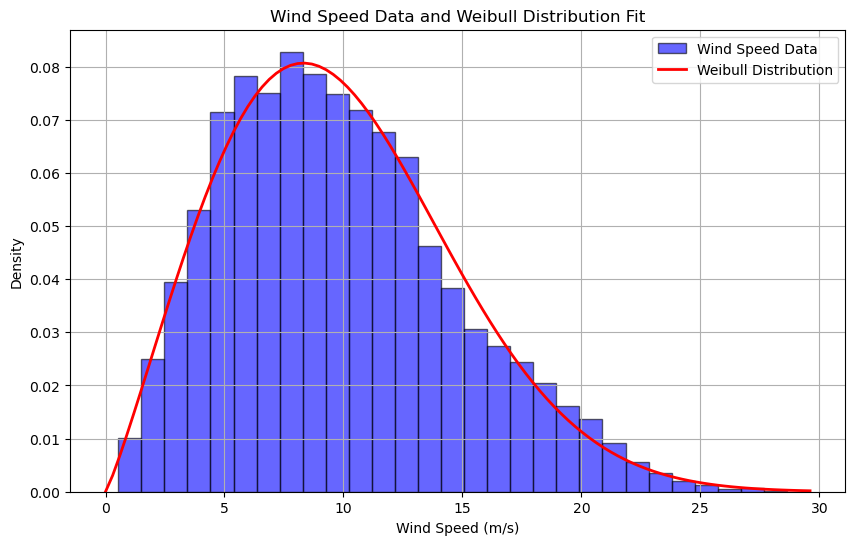

In [110]:
# Constants
T = 8760  # total hours/year [h]
rho = 1.225  # air density [kg/m^3]
D = 240  # rotor diameter [m]
A = np.pi * (D / 2)**2  # swept area [m^2]

if calculate_AEP:
    # Load data
    windspeed_data = df_B6B2['ws6_150m']
    power_curve_data = pd.read_csv(turbine_power_curve_path)

    # Calculate AEP
    results = data_analysis.calculate_aep(windspeed_data, power_curve_data, turbines_N9_1, turbines_N9_2, turbines_N9_3)
    data_analysis.print_aep_results(results, turbines_N9_1, turbines_N9_2, turbines_N9_3)    

if plot_weibull:
    plotting.plot_weibull_distribution(windspeed_data, results['shape'], results['scale'])

#### 23. Plot a power curve

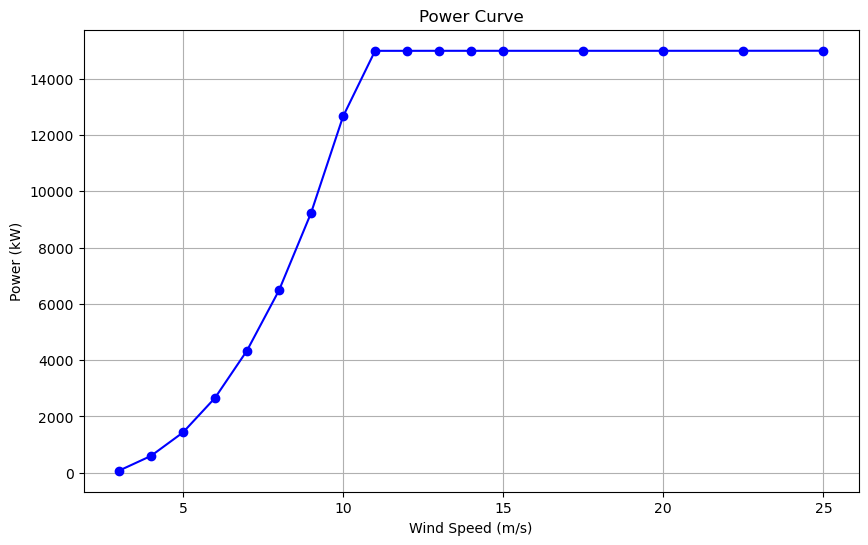

In [111]:
if plot_power_curve:
    plotting.plot_power_curve(power_curve_data)

#### 24. Exploring ERA5 data

In this section, ERA 5 data processed and analyzed:

- checking the data gaps
- calculating average wind speeds (yearly, monthly, overall)
- plotting wind speed and direction distribution
- checking the trend of the wind speeds

Furthermore, a long-term period of 2000 - 2023 is selected for MCP, to avoid the exceptionally high wind speed years in 1990's, because correcting the measurement data with this high wind speed period could result in overestimation.

Data Availability of the ERA5 data is 99.97%
Missing time periods are:
DatetimeIndex(['2023-02-26 00:00:00', '2023-02-26 01:00:00',
               '2023-02-26 02:00:00', '2023-02-26 03:00:00',
               '2023-02-26 04:00:00', '2023-02-26 05:00:00',
               '2023-02-26 06:00:00', '2023-02-26 07:00:00',
               '2023-02-26 08:00:00', '2023-02-26 09:00:00',
               '2023-02-26 10:00:00', '2023-02-26 11:00:00',
               '2023-02-26 12:00:00', '2023-02-26 13:00:00',
               '2023-02-26 14:00:00', '2023-02-26 15:00:00',
               '2023-02-26 16:00:00', '2023-02-26 17:00:00',
               '2023-02-26 18:00:00', '2023-02-26 19:00:00',
               '2023-02-26 20:00:00', '2023-02-26 21:00:00',
               '2023-02-26 22:00:00', '2023-02-26 23:00:00',
               '2023-02-27 00:00:00', '2023-02-27 01:00:00',
               '2023-02-27 02:00:00', '2023-02-27 03:00:00',
               '2023-02-27 04:00:00', '2023-02-27 05:00:00',
              

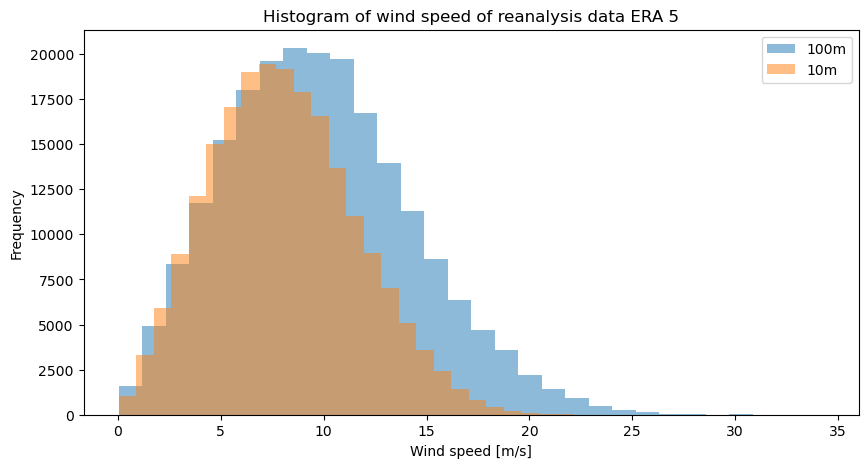

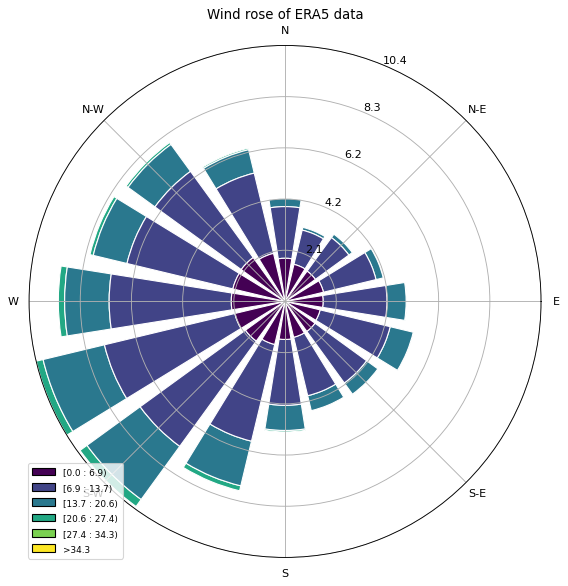

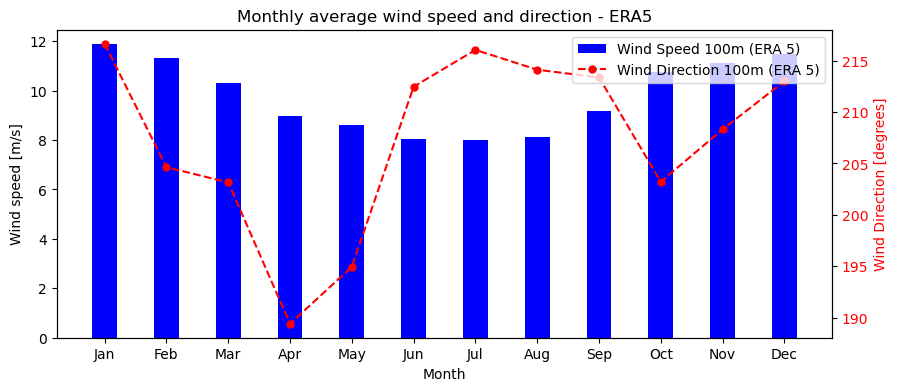

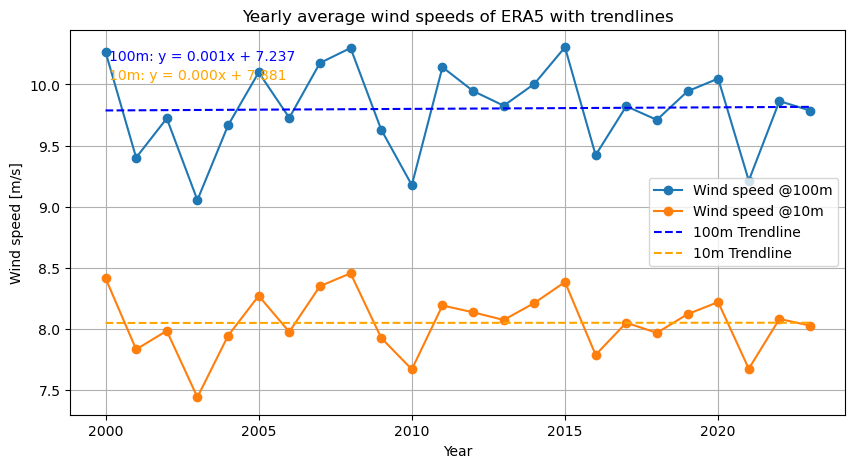


The average wind speed of ERA 5 over the whole period in m/s:
WS100    9.802337
WS10     8.051765
dtype: float64


In [114]:
if era5_analyze:
    start_year = 2000
    end_year = 2023

    Era5_data, yearly_avg, monthly_avg, overall_avg, missing_data = era5_analysis.analyze_era5_data(era5_path, start_year, end_year)

#### 25. Comparison of measurement data with ERA5 data
In this section, the measurement data is compared with ERA5 data and their correlation is checked.
- The time resolution of measurement data is 10min whereas that of ERA 5 is 1 hour. Therefore, the measurement data is resampled to 1 hour resolution and aligned with the ERA 5 data.

- Buoy2 measurement (@150m) period: 
2022-03-03 00:00:00 to 2023-06-15 23:50:00 
- Buoy6 measurement (@150m) period: 
2022-03-03 00:00:00 to 2023-04-04 04:30:00 
- ERA 5 period (@100m): 
2000-01-01 00:00:00 to 2023-12-31 23:00:00

The period of merged data(Buoy6 & ERA 5) is: 2000-01-01 00:00:00 to 2023-12-31 23:00:00

<Statistics for Buoy6>
Correlation coefficient between the measurement and Era5 wind speed: 0.903
Mean wind speed of the measurement at 150m: 9.893 m/s
Mean wind speed of Era 5 data at 100m: 9.496 m/s
Mean wind direction of the measurement at 150m: 203.979 degree
Mean wind direction of Era 5 data at 100m: 206.462 degree


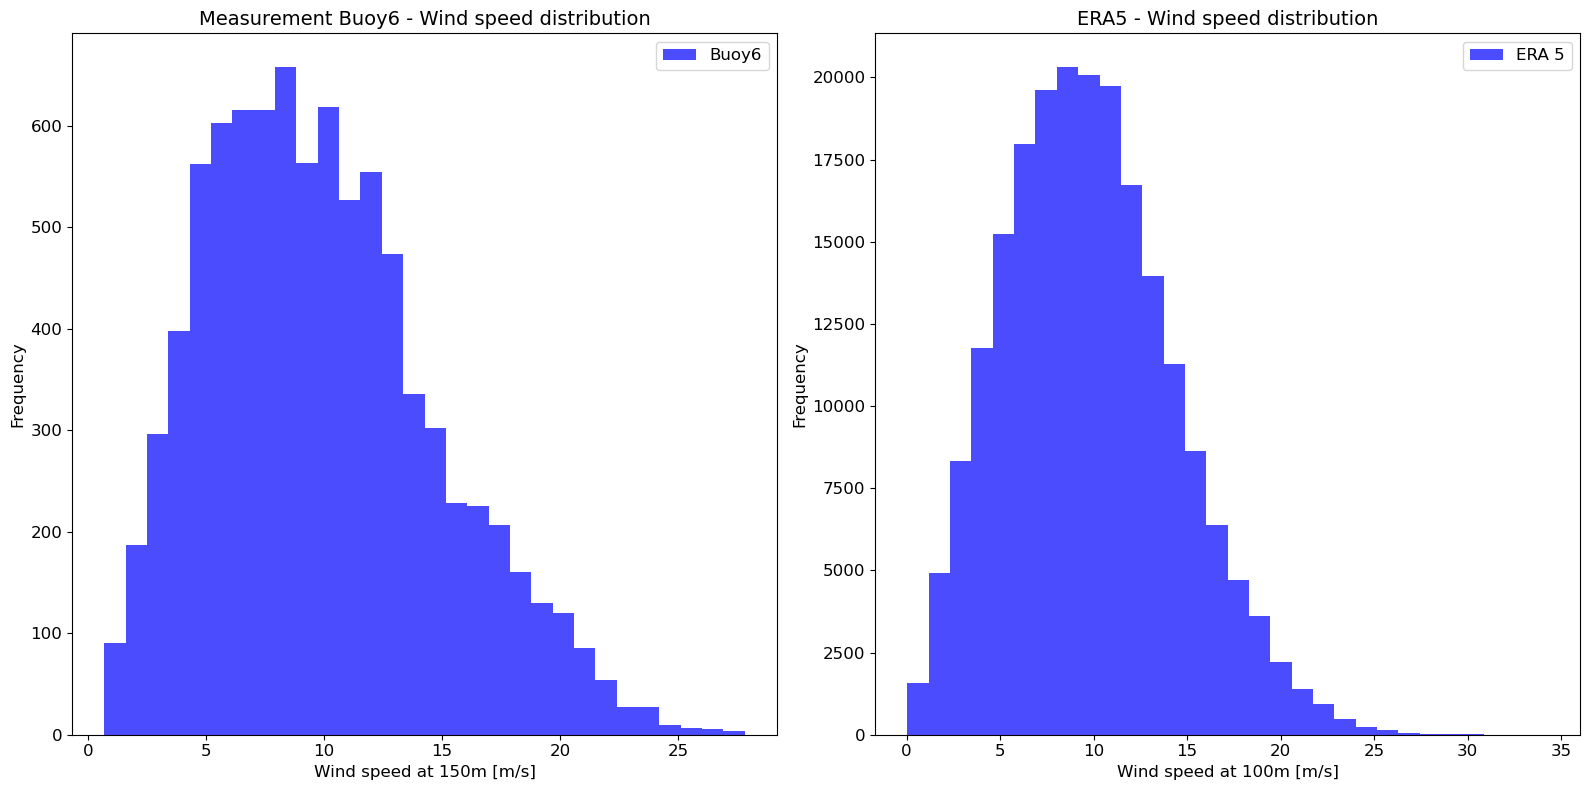

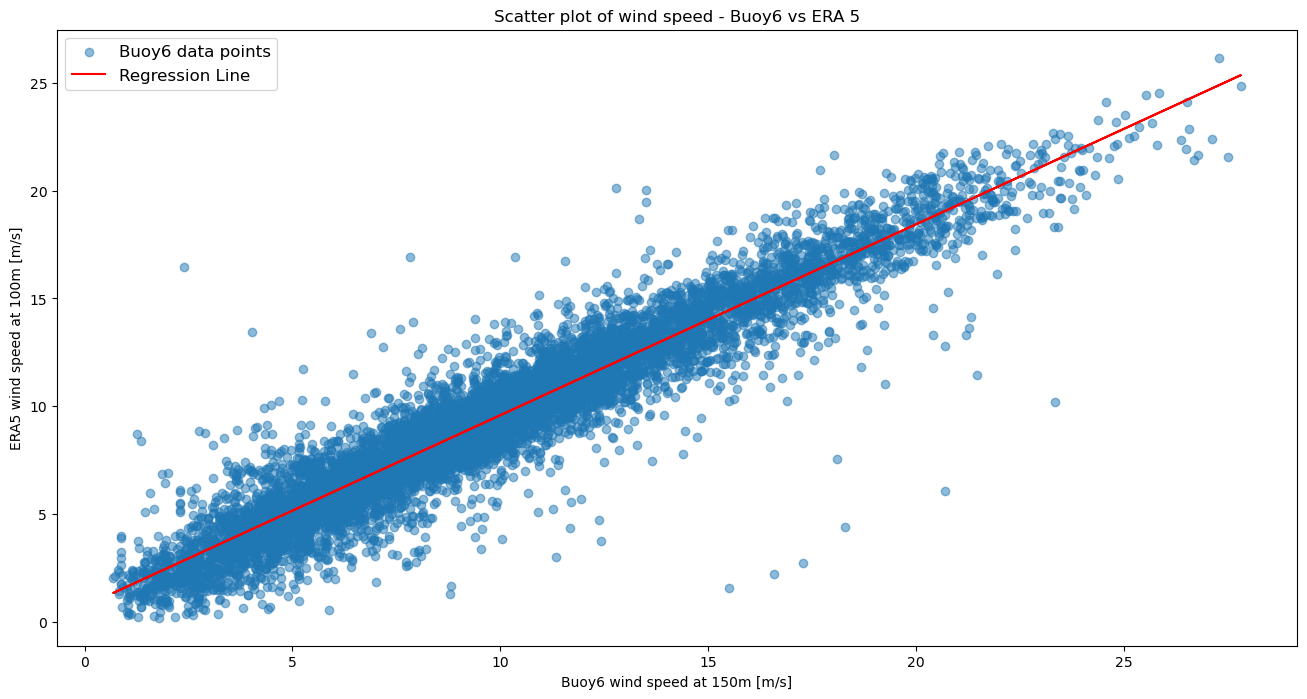

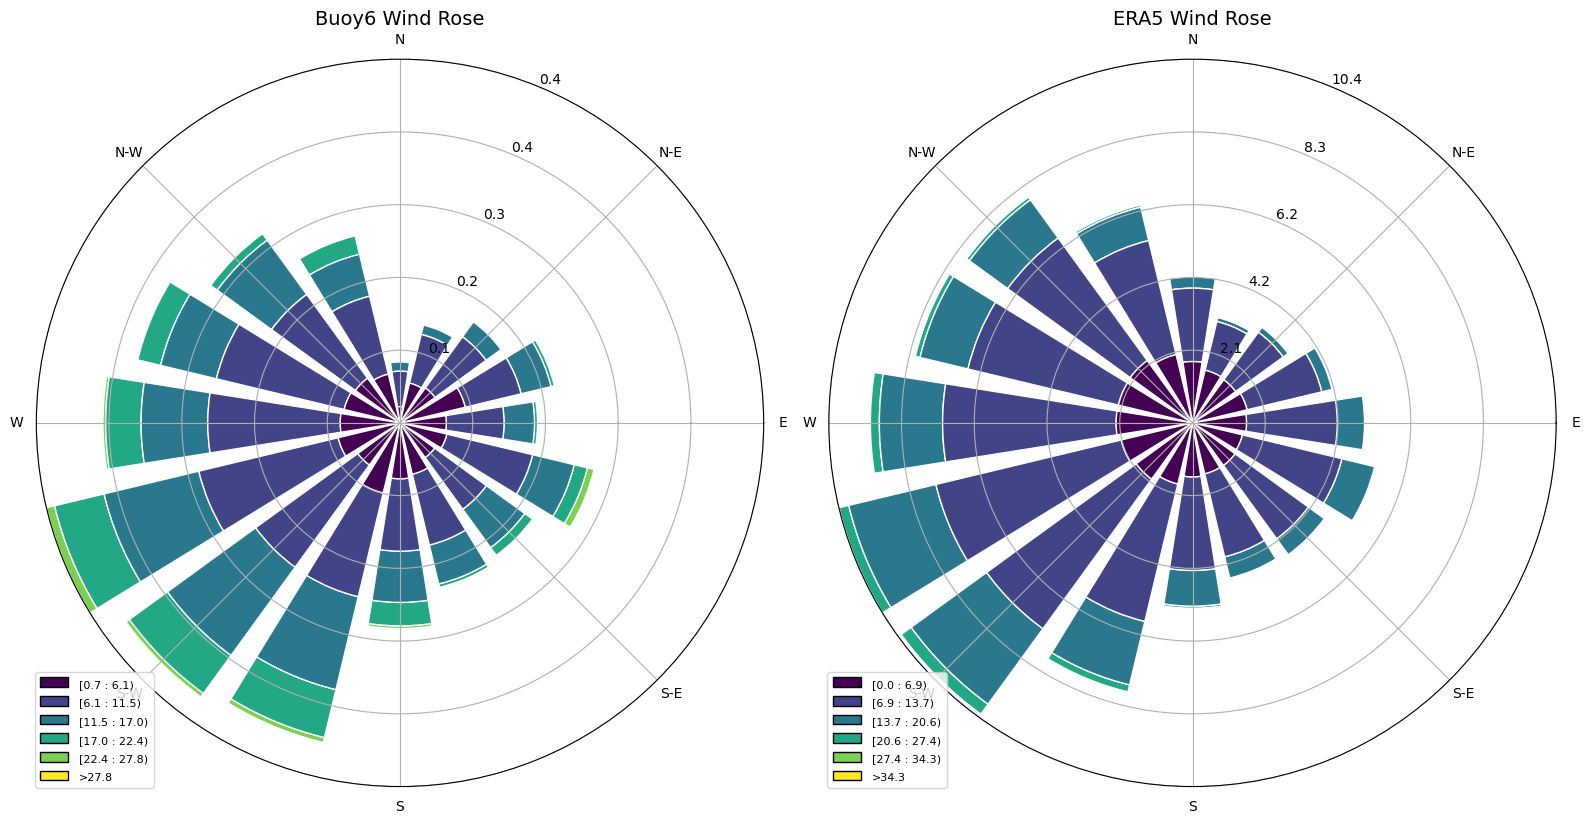

In [115]:
if era5_analyze:
    # Load processed measurement data
    meas_data = pd.read_csv('interpolated_ws_and_wd_for_150_m.csv')

    # Split the DataFrame
    #df_buoy2 = meas_data[['time', 'ws2_150m', 'wd2_150m']].copy()
    df_buoy6 = meas_data[['time', 'ws6_150m', 'wd6_150m']].copy()

    # Rename the columns
    #df_buoy2.rename(columns={'ws2_150m': 'meas_WS150', 'wd2_150m': 'meas_WD150'}, inplace=True)
    df_buoy6.rename(columns={'ws6_150m': 'meas_WS150', 'wd6_150m': 'meas_WD150'}, inplace=True)

    # select desired columns of ERA 5 data
    era5_selected = Era5_data[['time', 'WS100', 'WD100']].copy()
    era5_selected['time'] = pd.to_datetime(era5_selected['time'])
    era5_selected.set_index('time', inplace=True)
    era5_selected.rename(columns={'WS100': 'era5_WS100', 'WD100': 'era5_WD100'}, inplace=True)

    # Merge measurement data with Era5 data
    #aligned_data_buoy2 = era5_analysis.resample_and_merge_data(df_buoy2, era5_selected, 'Buoy2')
    aligned_data_buoy6 = era5_analysis.resample_and_merge_data(df_buoy6, era5_selected, 'Buoy6')

    # Plot results 
    #era5_analysis.calculate_statistics(aligned_data_buoy2, 'Buoy2')
    #era5_analysis.plot_meas_era5_comparison_WS(aligned_data_buoy2, 'Buoy2')
    #era5_analysis.plot_meas_era5_comparison_WD(aligned_data_buoy2, 'Buoy2')

    era5_analysis.calculate_statistics(aligned_data_buoy6, 'Buoy6')
    era5_analysis.plot_meas_era5_comparison_WS(aligned_data_buoy6, 'Buoy6')
    era5_analysis.plot_meas_era5_comparison_WD(aligned_data_buoy6, 'Buoy6')

### 26. Long-term correction of the measurement data - MCP using Linear Regression

Wind speed prediction
- Firstly, the data is prepared by separating features and target values, and handling missing data.
- With the 70% of data, a linear regression model is trained.
- The test data(30%) is fed into the trained model and predict wind speeds. By comparing the prediction and the actual data, the model's performance is evaluated using MAE, RMSE, and the correlation coefficient, with results visualized in a scatter plot.
- If the model is good enough, the measurement data is corrected into long-term using the trained model.
- Then, the measurement data and the LT corrected data are compared.

Wind direction prediction
- Wind direction data from ERA5 is corrected based on the mean difference from measured data.

<Evaluation of MCP model for Buoy6>
Mean absolute error: 1.068
Root mean squared error: 1.481
Correlation coefficient: 0.907


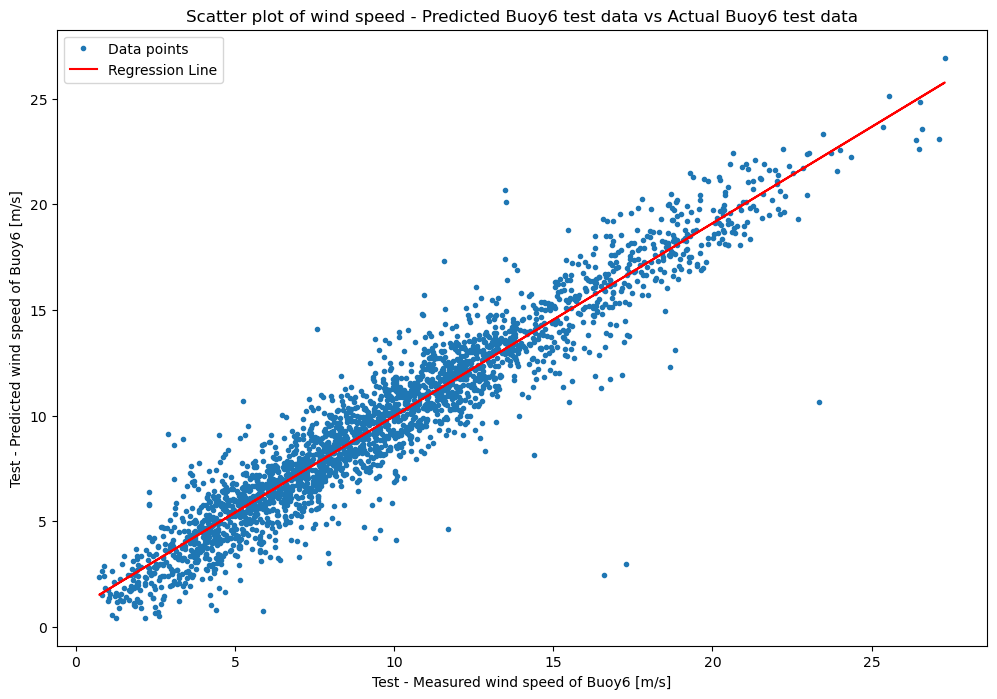

<Correction of wind direction for Buoy6>
Mean wind direction of measurement: 203.98 degrees
Mean wind direction of ERA5: 207.48 degrees
Wind directions of ERA 5 are corrected by -3.50 degrees
Mean wind direction of the measurement after the correction is 206.23 degrees


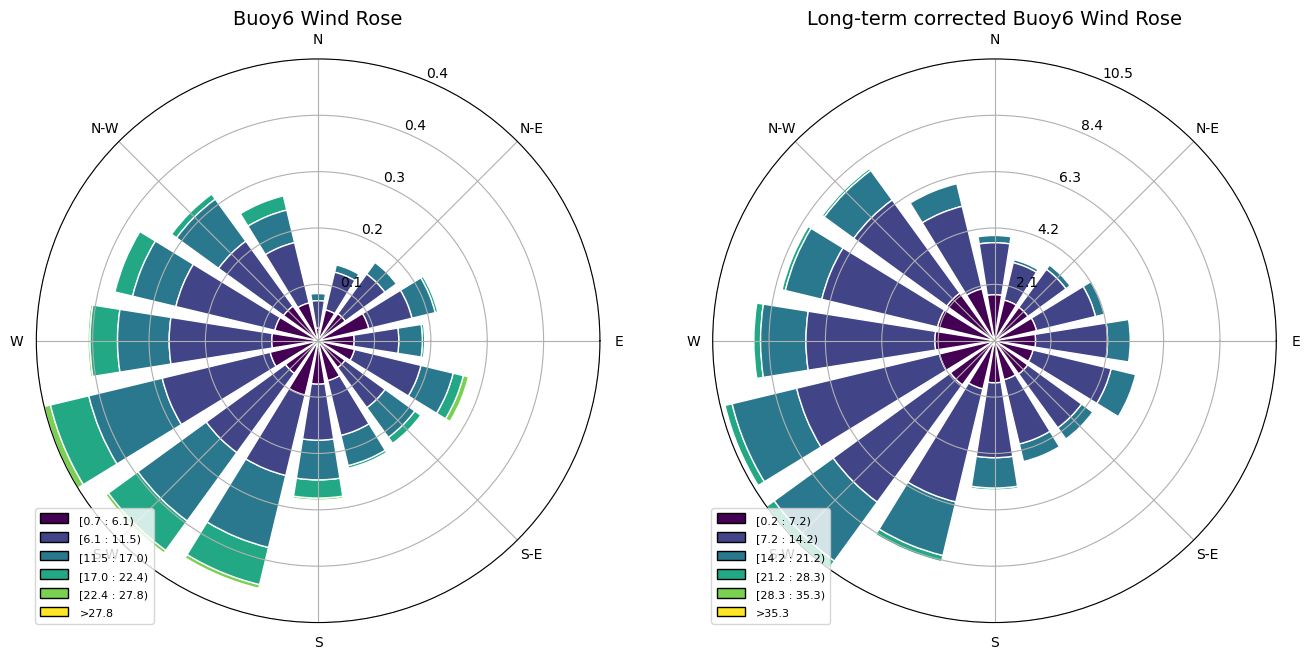


<Mean wind speeds for Buoy6>
Mean wind speed of the original measurement: 9.893 m/s
Mean wind speed of the long-term corrected measurement: 10.206 m/s

<Plotting data for Buoy6>


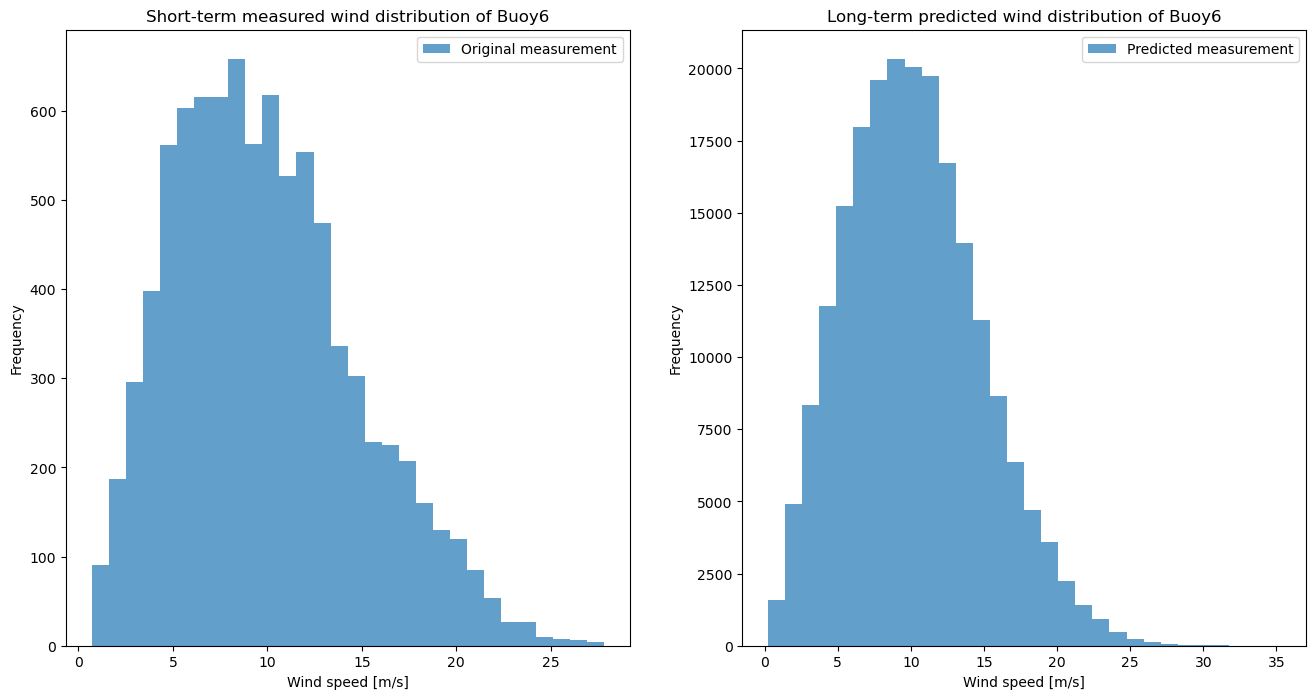

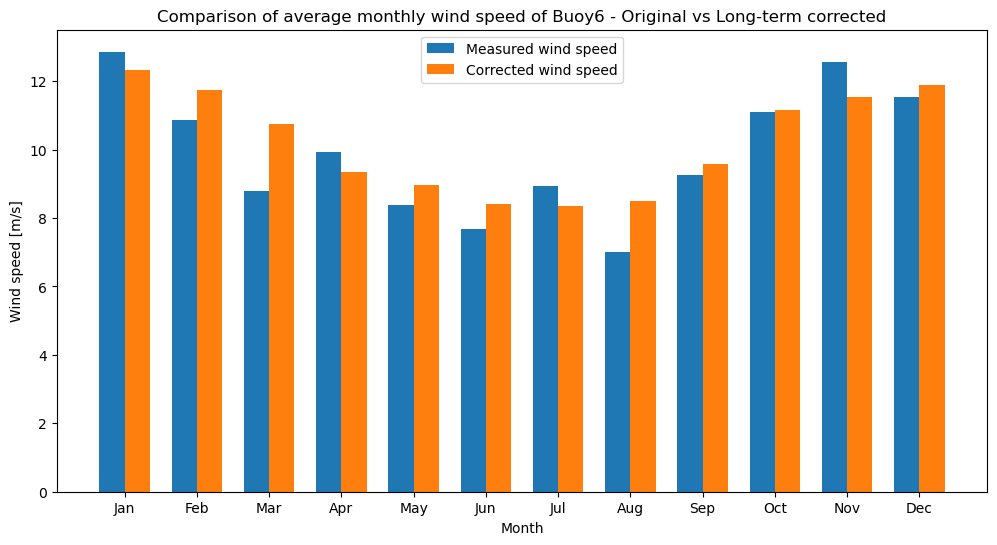

In [116]:
if longterm_correct:
    # Run MCP workflow for Buoy2
    #LT_corrected_buoy2 = longterm.run_lin_mcp_workflow(aligned_data_buoy2, 'Buoy2')
    #LT_corrected_buoy2[['long-term_WS150', 'long-term_WD150']].to_csv('LT_corrected_buoy2.csv', index=True)

    # Run MCP workflow for Buoy6
    LT_corrected_buoy6 = longterm.run_lin_mcp_workflow(aligned_data_buoy6, 'Buoy6')
    LT_corrected_buoy6[['long-term_WS150', 'long-term_WD150']].to_csv('LT_corrected_buoy6.csv', index=True)

#### 27. Long Term Wind Climate - Data Loading

In [117]:
# Data Paths
LT_corrected_B6_path = 'LT_corrected_buoy6.csv' #ws and wd are at 150 m height
#LT_corrected_B2_path = 'LT_corrected_buoy2.csv'

In [118]:
def read_LT_data_to_df(filepath):
    df = pd.read_csv(filepath)
    df.set_index('time', inplace=True)
    return df

df_B6 = read_LT_data_to_df(LT_corrected_B6_path)
#df_B2 = read_LT_data_to_df(LT_corrected_B2_path)

#### 28. Calculate the monthly and annual wind statistics for the wind speed and the wind direction for long-term corrected Buoy 6 

In [119]:
if longterm_analysis:
    df_month_mean_B6 = data_analysis.group_month_and_calc_mean(df_B6)
    #df_month_mean_B2 = data_analysis.group_month_and_calc_mean(df_B2)
    df_month_mean_B6

In [120]:
if longterm_analysis:
    # Calculate yearly statistics for wind speed
    data_analysis.calc_yearly_statistics(df_B6['long-term_WS150'], df_B6['long-term_WD150'])

Yearly Mean of Wind Speed: 10.21, Standard Deviation: 4.64
Yearly Mean of Wind Direction: 206.23, Standard Deviation: 92.87


#### 29. Plot the monthly mean wind speed and wind direction for LT-corrected Buoy 6

2024-06-25 21:11:21,349 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-25 21:11:21,350 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-25 21:11:21,363 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-06-25 21:11:21,364 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


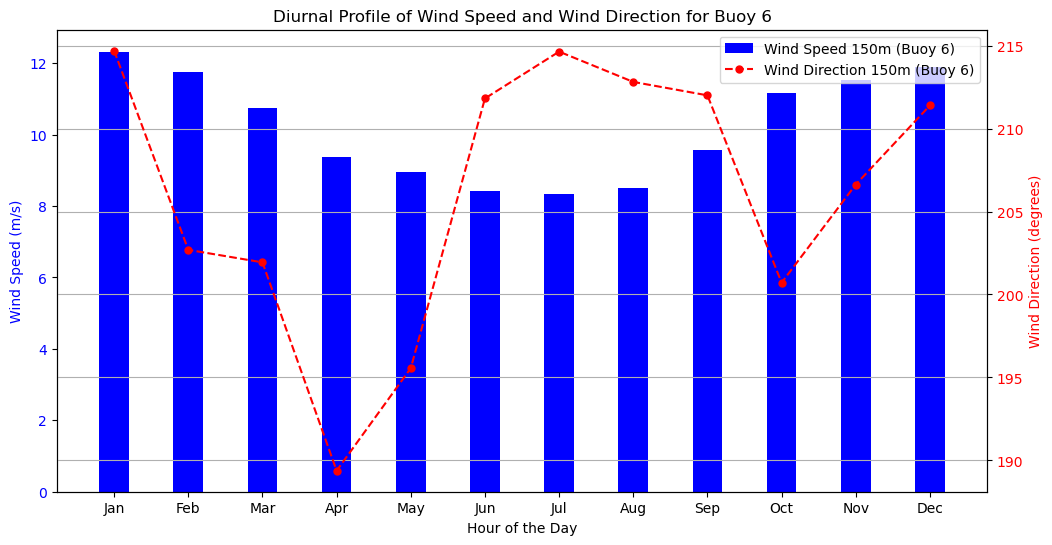

In [40]:
if longterm_analysis:
    plotting.plot_histogram_mounthly_mean(df_month_mean_B6['long-term_WS150'], df_month_mean_B6['long-term_WD150'])

#### 30. Group the data into hours of the day and calculate the mean wind speed and wind direction for each hour of the day
#### 31. Plot the diurnal wind speed and wind direction for LT-corrected Buoy 6

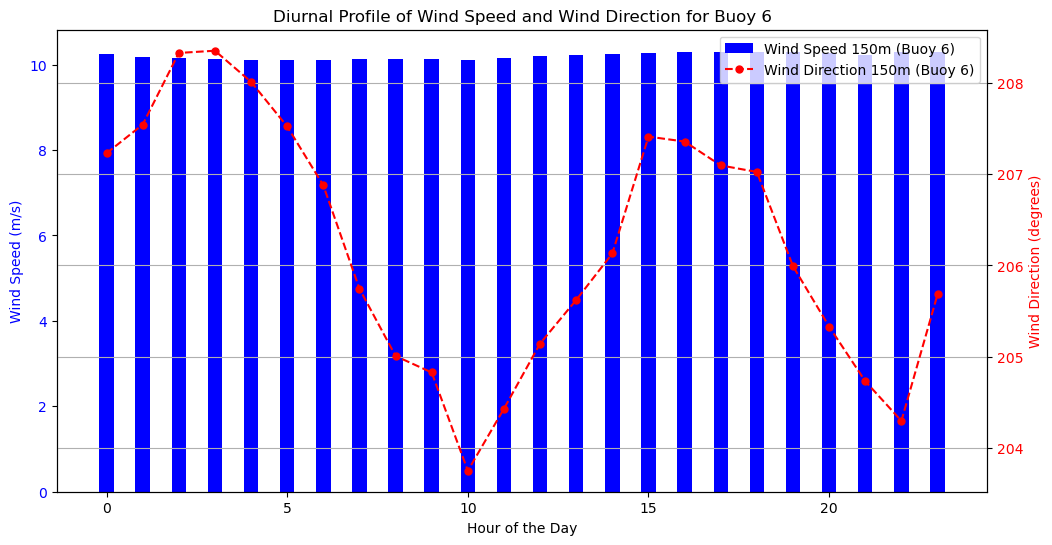

In [121]:
if longterm_analysis:
    diurnal_B6_df = longterm.calc_diurnal_wsand_wd(df_B6)
    longterm.plot_dirunal_ws_and_wd(diurnal_B6_df.index,  diurnal_B6_df['long-term_WS150'], diurnal_B6_df['long-term_WD150'])

#### 32. Plot wind roses for LT-corrected Buoy 6

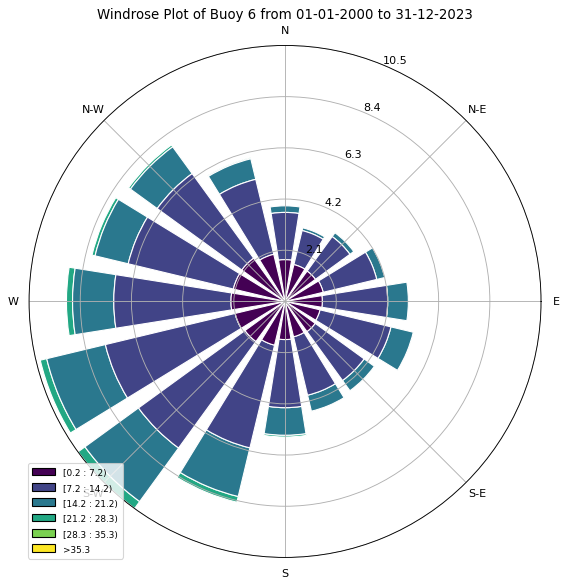

In [127]:
if longterm_analysis:
    plotting.plot_wind_rose(df_B6['long-term_WD150'], df_B6['long-term_WS150'], 'Windrose Plot of Buoy 6 from 01-01-2000 to 31-12-2023' )
    #plotting.plot_wind_rose(df_B2['long-term_WD150'], df_B2['long-term_WS150'], 'Windrose Plot of Buoy 2 from 01-01-2000 to 31-12-2023' )

#### 33. Plot a Weibull distribution of the wind speed

- weibull_min.fit(ws_data, floc=0): This part of the code fits a Weibull distribution to the wind speed data (ws_data). The fit method of the weibull_min distribution estimates the shape, location, and scale parameters of the Weibull distribution that best fit the provided data.
- shape, _, scale: The result of the fit method is a tuple containing the estimated parameters. In this case, shape represents the shape parameter of the Weibull distribution, and scale represents the scale parameter. The underscore _ is used to discard the estimated location parameter (floc), as it is fixed at 0 in this case.
- The weibull_pdf function defines the probability density function (PDF) for a Weibull distribution. function that describes the likelihood of a continuous random variable falling within a particular range of values.

#### 34. Calculate the annual power production of one turbine, one field, and the entire farm based on the LT-corrected data

Remark on wind turbine data: The "ct" in the turbine data refers to the thrust coefficient. It is a dimensionless number that describes the thrust force exerted by the wind on the turbine blades relative to the dynamic pressure of the wind.

APP of one Turbine: 84.1941 GWh
Estimated error: 0.0008 GWh
Annual Energy Production of N-9.1 (133 Turbines): 11.1978 TWh
Annual Energy Production of N-9.2 (133 Turbines): 11.1978 TWh
Annual Energy Production of N-9.3 (100 Turbines): 8.4194 TWh
Total Energy Production of all three fields (366 Turbines): 30.8151 TWh
This is 6.08 % of the electricity consumed in one yr in Germany.


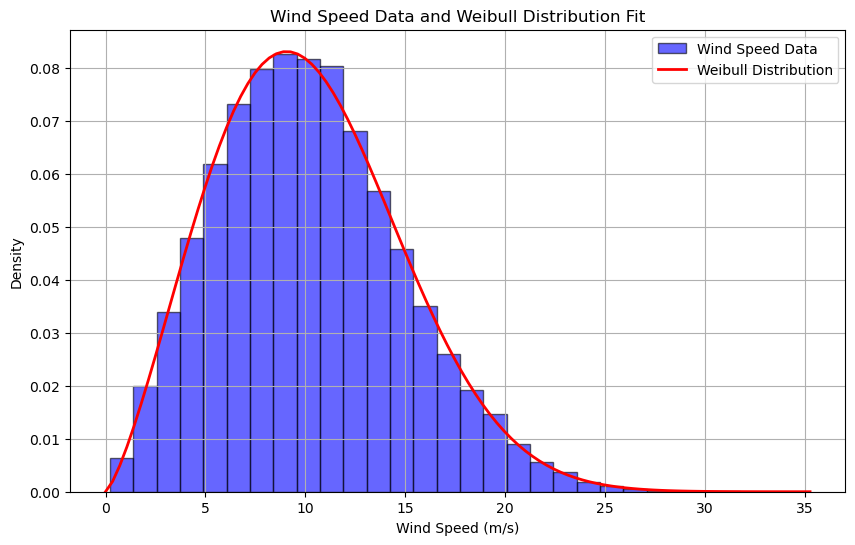

In [125]:
if longterm_AEP:
    # Load data
    windspeed_data = df_B6['long-term_WS150']

    # Calculate energy production
    results = longterm.calculate_energy_production(windspeed_data, power_curve_data, turbines_N9_1, turbines_N9_2, turbines_N9_3)

    # Print results
    print(f"APP of one Turbine: {results['APP_one_turbine']:.4f} GWh")
    print(f"Estimated error: {results['APP_error']:.4f} GWh")
    print(f"Annual Energy Production of N-9.1 (133 Turbines): {results['AEP_N9_1']:.4f} TWh")
    print(f"Annual Energy Production of N-9.2 (133 Turbines): {results['AEP_N9_2']:.4f} TWh")
    print(f"Annual Energy Production of N-9.3 (100 Turbines): {results['AEP_N9_3']:.4f} TWh")
    print(f"Total Energy Production of all three fields (366 Turbines): {results['total_farm_yield_no_wakes']:.4f} TWh")
    print(f"This is {results['percentage_of_german_consumption']:.2f} % of the electricity consumed in one yr in Germany.")

    # Plot Weibull distribution
    longterm.plot_weibull_distribution(windspeed_data, results['shape'], results['scale'])

    # Save total farm yield
    longterm.save_total_farm_yield(results['total_farm_yield_no_wakes'])

#### 35. Plot a power curve

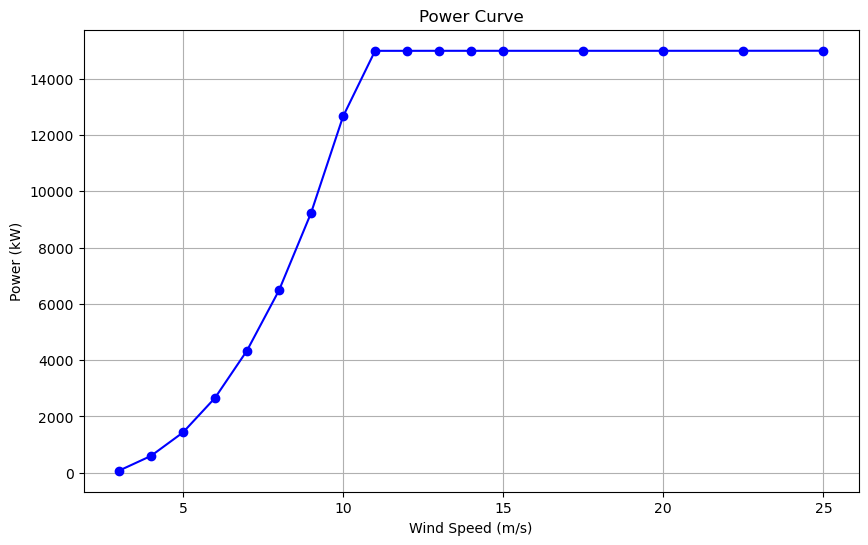

In [126]:
if longterm_AEP:
    plotting.plot_power_curve(power_curve_data)

#### 36. Generation of a geometric layout

We ploted the given example Layout for N.9.1-3 to determine the Number of Turbines [133,133,100] for ['N-9.1','N-9.2','N-9.3'] and the minimum Turbine distante using a custome function that determins the smallest distance between all Turbines. We found a min. distance of 967m, which is about 4*D (with D=240m being the turbine diameter). 

In [46]:
if geo_foxes_layout:
    Areas = ['N-9.1','N-9.2','N-9.3']
    N     = [133,133,100]                # Number Turbines from the example
    Area_specs = geo_layout.set_boundary(site_shp, Areas, N)

Problem 'geom_reg_grid' (GeomRegGrid): Initializing
---------------------------------------------------
  n_vars_int  : 0
  n_vars_float: 5
---------------------------------------------------
  n_objectives: 1
  n_obj_cmptns: 1
---------------------------------------------------
  n_constraints: 2
  n_con_cmptns: 134
---------------------------------------------------
Grid data:
  pmin        = [4034831.0394465 3480275.087553 ]
  pmax        = [4057170.143415  3500481.6654685]
  min dist    = 960.0
  max dist    = 30122.107449026666
  n row max   = 34
  n max       = 1156


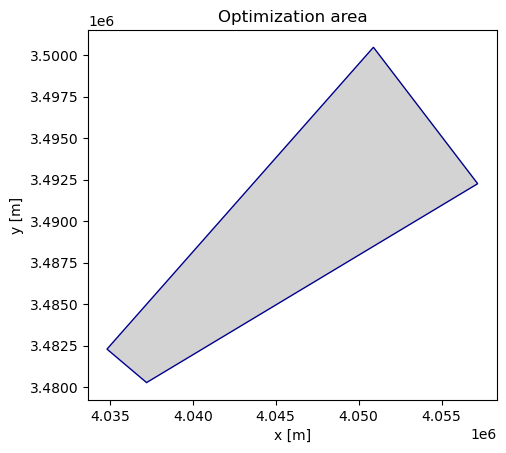

new test3
Loading pymoo
pymoo successfully loaded
Initializing Optimizer_pymoo
Selecting sampling: float_random (FloatRandomSampling)
Selecting algorithm: GA (GA)

Problem:
--------
  vectorize: True

Algorithm:
----------
  type: GA
  pop_size: 10
  seed: 42

Termination:
------------
  n_gen: 40

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |       10 |  2.176431E+07 |  3.719419E+07 |             - |             -
     2 |       20 |  2.099483E+07 |  2.631206E+07 |             - |             -
     3 |       30 |  1.170438E+07 |  2.066322E+07 |             - |             -
     4 |       40 |  1.135392E+07 |  1.819702E+07 |             - |             -
     5 |       50 |  1.098020E+07 |  1.331786E+07 |             - |             -
     6 |       60 |  9.690962E+06 |  1.114181E+07 |             - |             -
     7 |       70 |  9.187520E+06 |  1.050943E+07 |             - |             -
     8 |       80 |  8.812803E+06 |  9.61621

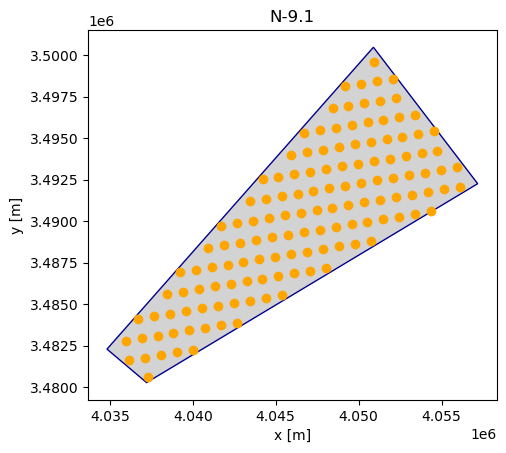

Problem 'geom_reg_grid' (GeomRegGrid): Initializing
---------------------------------------------------
  n_vars_int  : 0
  n_vars_float: 5
---------------------------------------------------
  n_objectives: 1
  n_obj_cmptns: 1
---------------------------------------------------
  n_constraints: 2
  n_con_cmptns: 134
---------------------------------------------------
Grid data:
  pmin        = [4030771.9974525 3482761.341733 ]
  pmax        = [4050421.7055365 3507547.0371265]
  min dist    = 960.0
  max dist    = 31629.760099087613
  n row max   = 35
  n max       = 1225


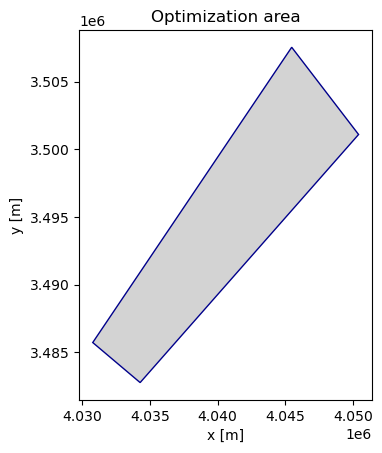

new test3
Initializing Optimizer_pymoo
Selecting sampling: float_random (FloatRandomSampling)
Selecting algorithm: GA (GA)

Problem:
--------
  vectorize: True

Algorithm:
----------
  type: GA
  pop_size: 10
  seed: 42

Termination:
------------
  n_gen: 40

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |       10 |  2.377564E+07 |  4.030523E+07 |             - |             -
     2 |       20 |  2.292380E+07 |  2.772832E+07 |             - |             -
     3 |       30 |  1.171764E+07 |  2.240856E+07 |             - |             -
     4 |       40 |  1.171764E+07 |  1.950716E+07 |             - |             -
     5 |       50 |  1.053037E+07 |  1.286037E+07 |             - |             -
     6 |       60 |  1.006279E+07 |  1.133185E+07 |             - |             -
     7 |       70 |  8.122139E+06 |  1.038149E+07 |             - |             -
     8 |       80 |  3.934209E+06 |  8.853625E+06 |             - |             -
  

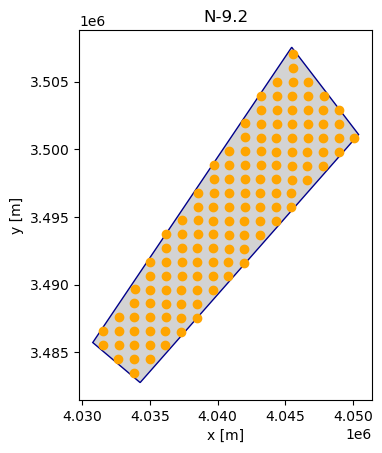

Problem 'geom_reg_grid' (GeomRegGrid): Initializing
---------------------------------------------------
  n_vars_int  : 0
  n_vars_float: 5
---------------------------------------------------
  n_objectives: 1
  n_obj_cmptns: 1
---------------------------------------------------
  n_constraints: 2
  n_con_cmptns: 101
---------------------------------------------------
Grid data:
  pmin        = [4045926.173369 3492647.250246]
  pmax        = [4063582.055718 3511516.496745]
  min dist    = 960.0
  max dist    = 25841.413370048784
  n row max   = 29
  n max       = 841


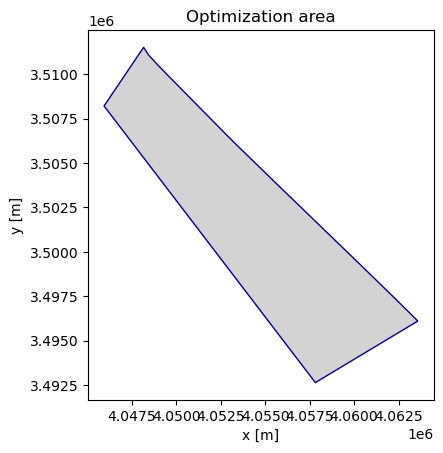

new test3
Initializing Optimizer_pymoo
Selecting sampling: float_random (FloatRandomSampling)
Selecting algorithm: GA (GA)

Problem:
--------
  vectorize: True

Algorithm:
----------
  type: GA
  pop_size: 10
  seed: 42

Termination:
------------
  n_gen: 40

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |       10 |  1.232935E+07 |  2.075542E+07 |             - |             -
     2 |       20 |  1.189911E+07 |  1.463279E+07 |             - |             -
     3 |       30 |  5.962535E+06 |  1.158359E+07 |             - |             -
     4 |       40 |  5.962535E+06 |  1.009967E+07 |             - |             -
     5 |       50 |  5.487993E+06 |  6.967839E+06 |             - |             -
     6 |       60 |  5.047480E+06 |  5.652954E+06 |             - |             -
     7 |       70 |  4.231813E+06 |  5.265862E+06 |             - |             -
     8 |       80 |  4.231813E+06 |  4.688376E+06 |             - |             -
  

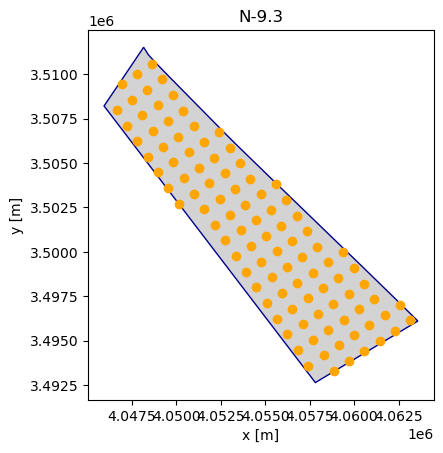

In [47]:
if geo_foxes_layout:  
    Parameters = dict(
        D=240,                  # D :         Rotor Diameter , int
        min_dist = 4, #(*D)     # min_dist:   minimal Distance between Turbines (min_dis * D)    
        pop_size = 10,          # pop_size:   size of Popolation, int
        n_gen = 40,             # n_gen:      numer of generations, int
        seed = 42               # seed:       Seed for randome number generator
        )

    for Place in Area_specs:
        geo_layout.NoWake_Layout(Place,Parameters)
        # Place: list
            # boundary:   the geometric Layout in wich to place the turbines , Foxes - class object
            # name
            # n :         number of Turbines , int
        # return: NoWake_Layout_'Name'.csv

#### 37. Plot all optimized Areas in one figure

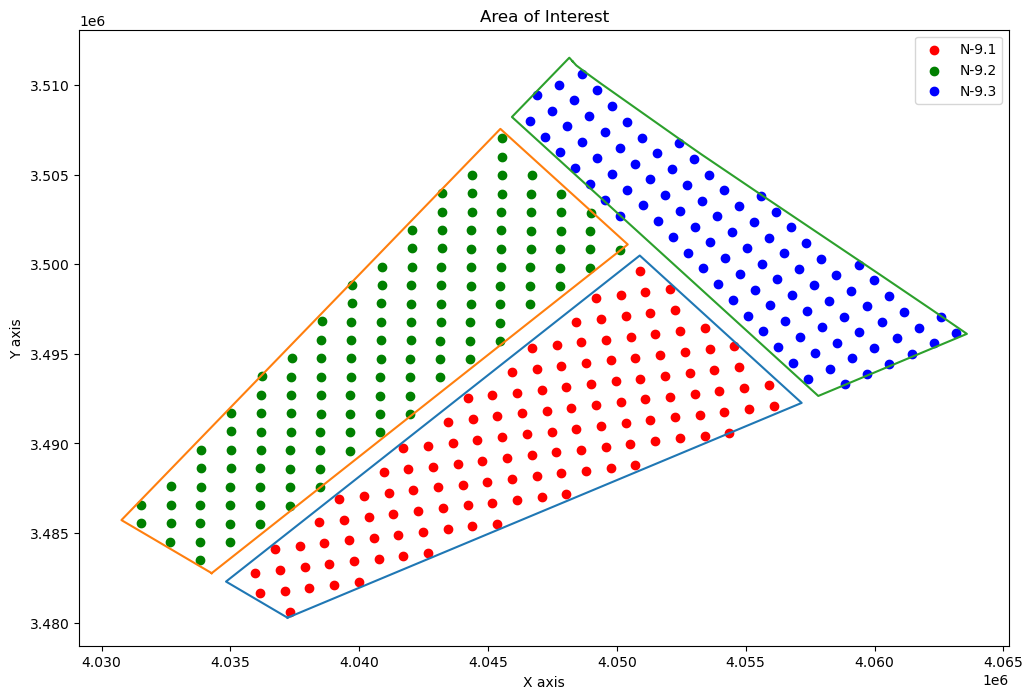

In [48]:
if geo_foxes_layout:
    geo_layout.plot_all_optimized_areas(Areas, site_shp)

### 38. [TASK 6] Calculate the yield of the areas N-9.1, N-9.2, N-9.3 without external effects. Use the long-term corrected ERA5 data as input. 

In [49]:
if foxes_analyze: 
    data = pd.read_csv('LT_corrected_buoy6.csv', index_col=0)
    data.index = pd.to_datetime(data.index)

    data_2023 = data[data.index.year == 2023]

    print(data_2023)

                     long-term_WS150  long-term_WD150
time                                                 
2023-01-01 00:00:00        21.713169       225.807048
2023-01-01 01:00:00        21.750724       231.652676
2023-01-01 02:00:00        20.098199       231.573837
2023-01-01 03:00:00        19.647972       232.316028
2023-01-01 04:00:00        18.366608       230.902699
...                              ...              ...
2023-12-31 19:00:00        17.769518       179.573122
2023-12-31 20:00:00        17.508682       184.900390
2023-12-31 21:00:00        17.002032       187.865526
2023-12-31 22:00:00        16.453667       191.210134
2023-12-31 23:00:00        15.501675       199.056759

[8688 rows x 2 columns]


### 39. **[TASK 6]** Compute Power for gem.Layout without external wake effects 

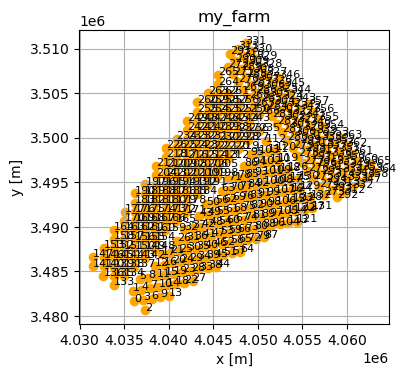

Calculating wind farm power for gem.Layout N9 Cluster for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 104.13 ms
[########################################] | 100% Completed | 242.07 s
Efficiency added to farm results


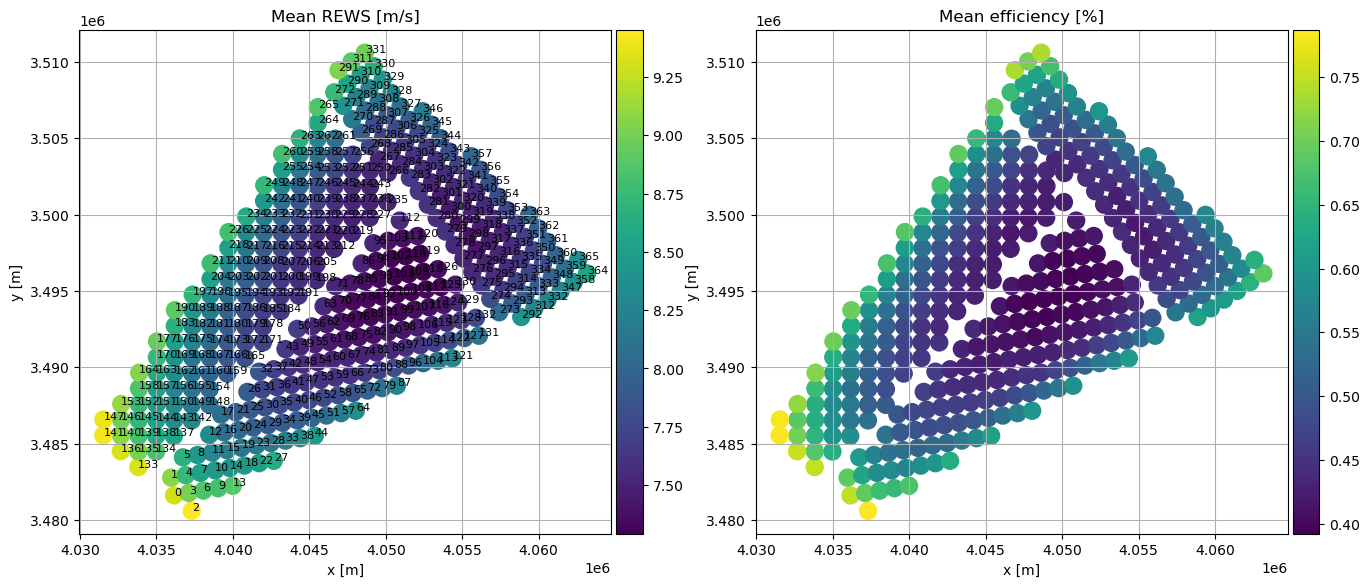

Summary Results:                        Farm power [MW]  Farm ambient power [MW]  \
gem.Layout N9 Cluster      2190.373233              3420.940609   

                       Farm efficiency [%]  Annual farm yield [TWh]  
gem.Layout N9 Cluster            64.028391                 19.18767  


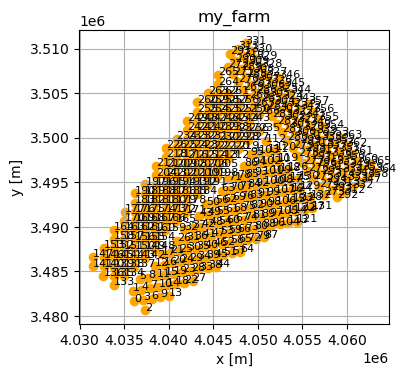

Calculating wind farm power for gem.Layout N9 Cluster for Wake Model: ['TurbOPark_linear']:
[########################################] | 100% Completed | 104.31 ms
[########################################] | 100% Completed | 280.04 s
Efficiency added to farm results


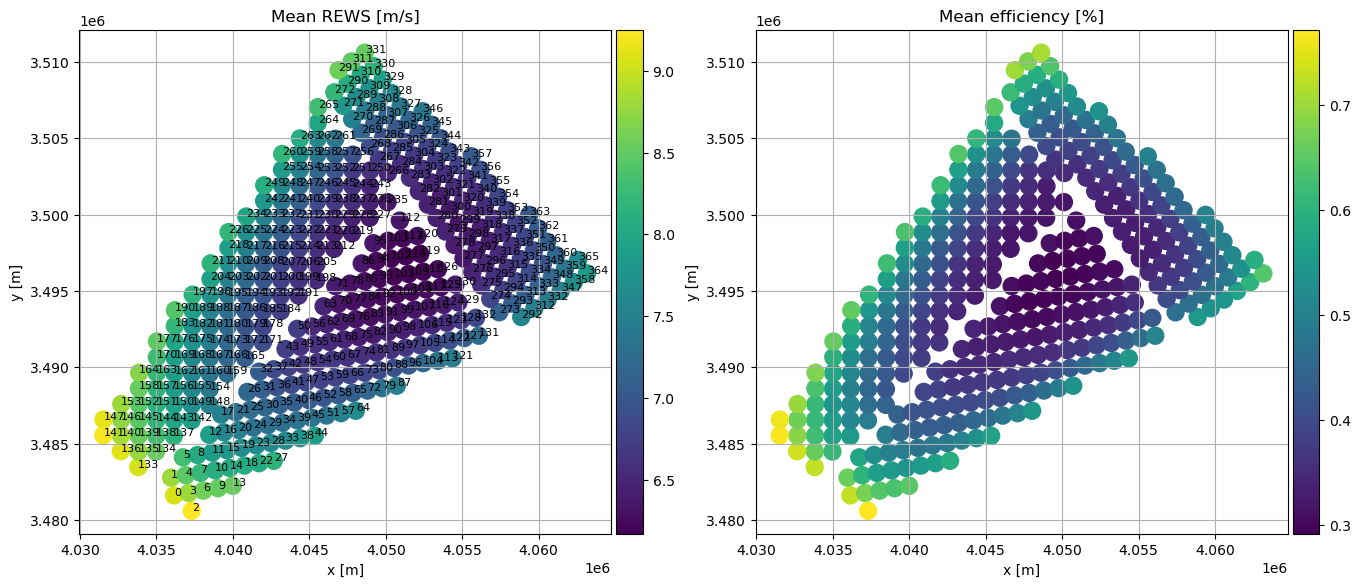

Summary Results:                        Farm power [MW]  Farm ambient power [MW]  \
gem.Layout N9 Cluster      1928.723627              3420.940609   

                       Farm efficiency [%]  Annual farm yield [TWh]  
gem.Layout N9 Cluster            56.379921                16.895619  


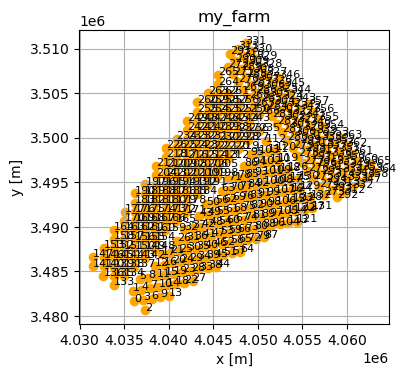

Calculating wind farm power for gem.Layout N9 Cluster for Wake Model: ['Jensen_linear']:
[########################################] | 100% Completed | 106.05 ms
[########################################] | 100% Completed | 55.63 s
Efficiency added to farm results


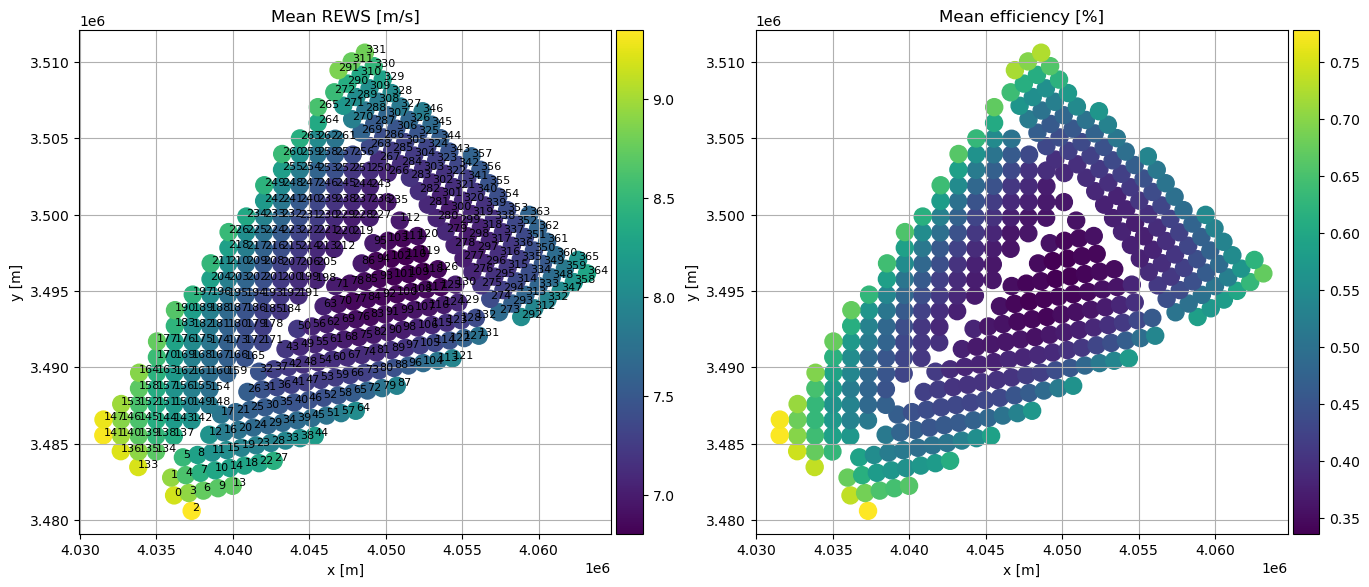

Summary Results:                        Farm power [MW]  Farm ambient power [MW]  \
gem.Layout N9 Cluster      2074.582811              3420.940609   

                       Farm efficiency [%]  Annual farm yield [TWh]  
gem.Layout N9 Cluster            60.643637                18.173345  


In [50]:
if foxes_analyze & no_ext_wake_layout_power_foxes_1:
    # Analyze farm yield with Bastankhah2014_linear wake model
    all_results_inter_wakes, turb_results_inter_wakes = foxes_analysis.analyze_farm_yield(data_2023, Areas)

    # Analyze farm yield with TurbOPark_linear wake model
    all_res_inter_wa_Turb0, turb_res_inter_wa_Turb0 = foxes_analysis.analyze_farm_yield(data_2023, Areas, wake_model="TurbOPark_linear")

    # Analyze farm yield with Jensen_linear wake model
    all_res_inter_wa_Jens, turb_res_inter_wa_Jens = foxes_analysis.analyze_farm_yield(data_2023, Areas, wake_model="Jensen_linear")

### 40. **[TASK 7]** Use 3 other wake models to calculate the farm yield

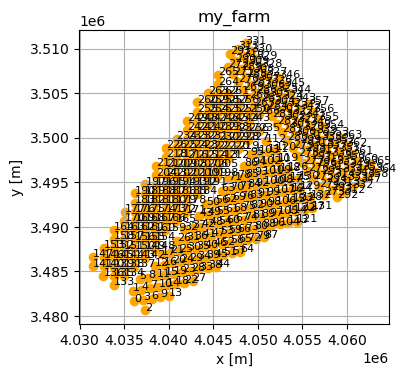

Calculating wind farm power for gem.Layout N9 Cluster for Wake Model: ['TurbOPark_linear']:
[########################################] | 100% Completed | 104.04 ms
[########################################] | 100% Completed | 283.31 s
Efficiency added to farm results


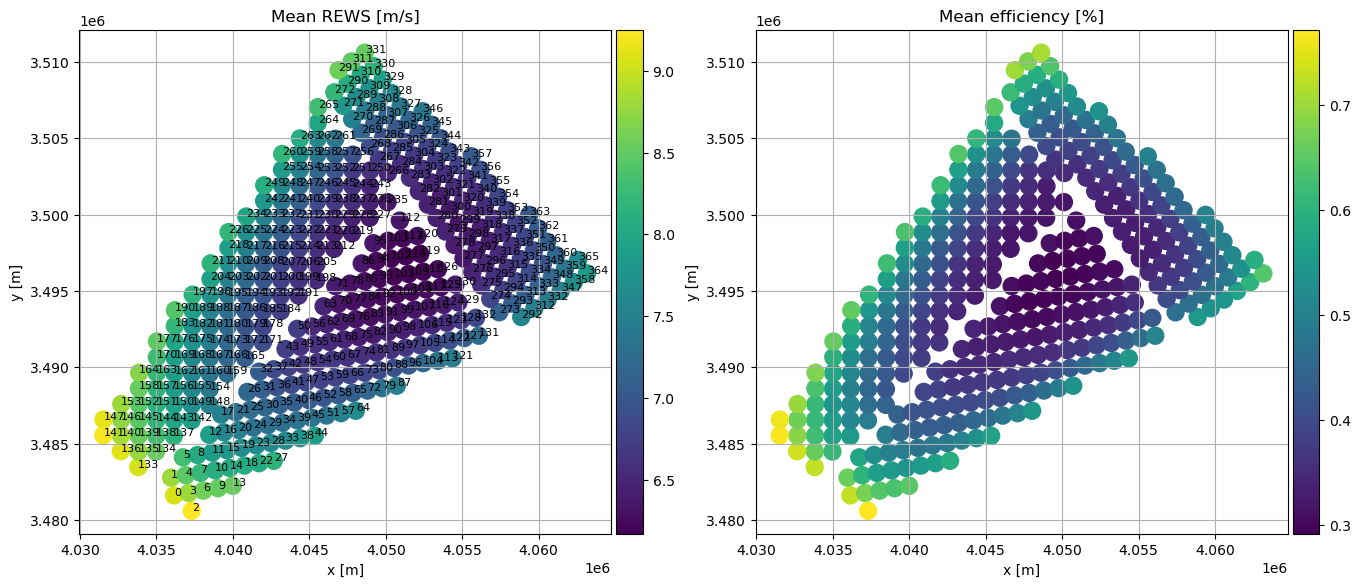

Summary Results:                        Farm power [MW]  Farm ambient power [MW]  \
gem.Layout N9 Cluster      1928.723627              3420.940609   

                       Farm efficiency [%]  Annual farm yield [TWh]  
gem.Layout N9 Cluster            56.379921                16.895619  


In [51]:
if foxes_analyze & no_ext_wake_layout_power_foxes_2:
    # Analyze farm yield with TurbOPark_linear wake model
    all_res_inter_wa_Turb0, turb_res_inter_wa_Turb0 = foxes_analysis.analyze_farm_yield(data_2023, Areas, wake_model="TurbOPark_linear")
    # print(f'Summary Results: {all_res_inter_wa_Turb0}')
    all_res_inter_wa_Turb0.to_csv('yield_N9-1-3_internal_wakes_Turb0Park.csv')

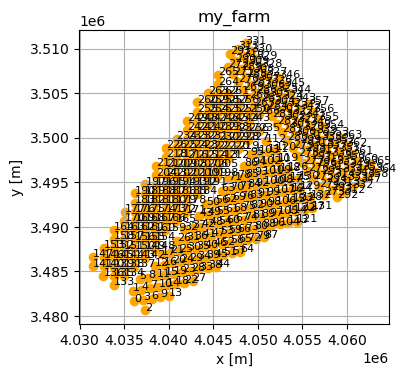

Calculating wind farm power for gem.Layout N9 Cluster for Wake Model: ['Jensen_linear']:
[########################################] | 100% Completed | 104.09 ms
[########################################] | 100% Completed | 48.85 s
Efficiency added to farm results


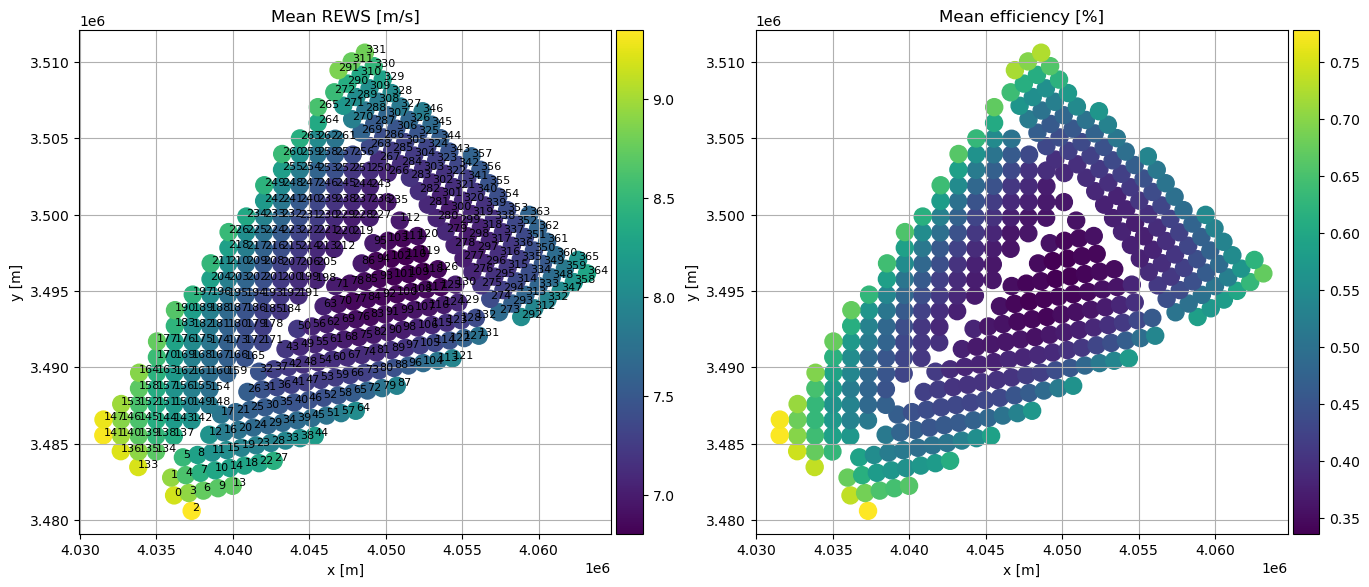

Summary Results:                        Farm power [MW]  Farm ambient power [MW]  \
gem.Layout N9 Cluster      2074.582811              3420.940609   

                       Farm efficiency [%]  Annual farm yield [TWh]  
gem.Layout N9 Cluster            60.643637                18.173345  


In [52]:
if foxes_analyze & no_ext_wake_layout_power_foxes_3:
    # Analyze farm yield with Jensen_linear wake model
    all_res_inter_wa_Jens, turb_res_inter_wa_Jens = foxes_analysis.analyze_farm_yield(data_2023, Areas, wake_model="Jensen_linear")
    # print(f'Summary Results: {all_res_inter_wa_Jens}')
    all_res_inter_wa_Jens.to_csv('yield_N9-1-3_internal_wakes_Jensen.csv')

### 41. **[TASK 8]** Calculate Farm Yield with internal and external wake effects 


In [53]:
# Function to group by time: year for now and calculate the mean
def group_month_and_calc_mean(df):
    df = df.copy()  # Ensure working with a copy of the DataFrame
    df.index = pd.to_datetime(df.index)
    df.loc[:, 'year'] = df.index.year  # Use .loc to avoid the SettingWithCopyWarning
    df_month_mean = df.groupby('year').mean()
    return df_month_mean

df_month_mean = group_month_and_calc_mean(data_2023)
df_month_mean


long-term_WS150  long-term_WD150
year                                  
2023        10.189951       206.664341

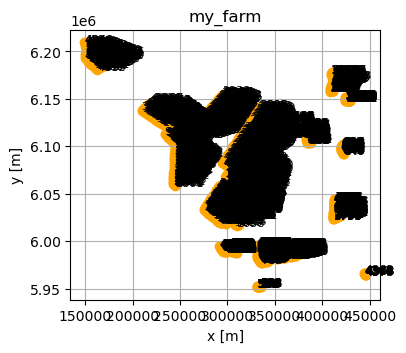

Calculating wind farm power for Combined_Cluster for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 102.33 ms
[########################################] | 100% Completed | 11.92 s
Efficiency added to farm results


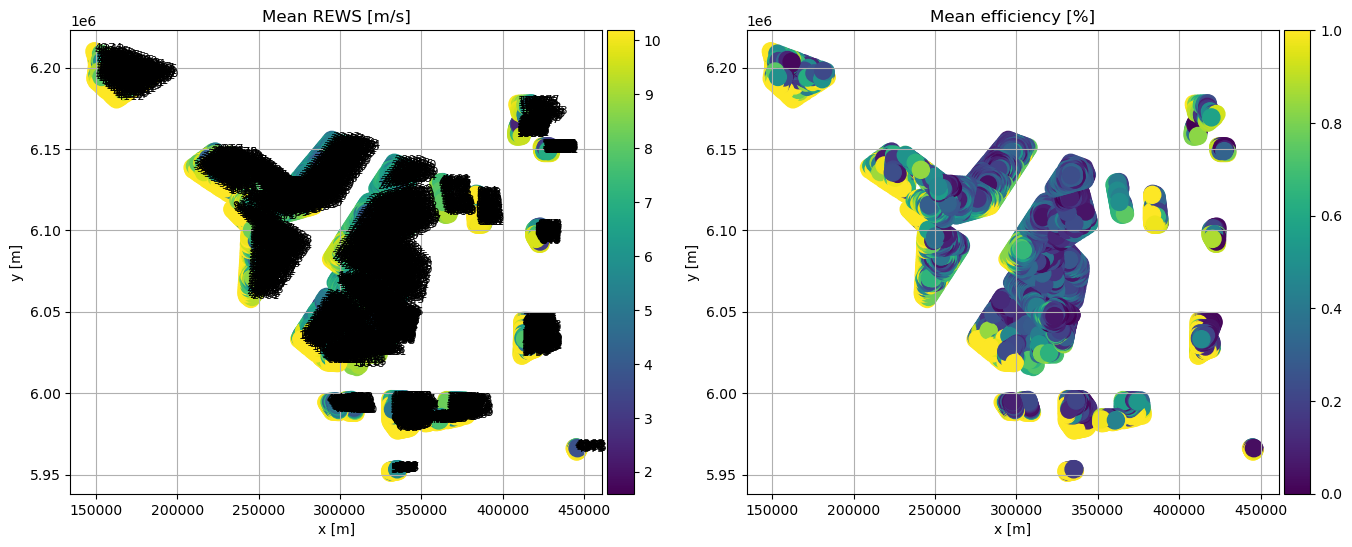

In [58]:
from foxes_analysis import Foxes_Farm_Power
import foxes
import foxes.variables as FV

# Paths
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
external_farms_path = 'data/turbine-info/coordinates/existing_planned/'

# Read internal turbine layout files
internal_files = os.listdir(turbines_area_of_interest_path) # List all files in the directory
Turb_dfs = [pd.read_csv(turbines_area_of_interest_path + file) for file in internal_files]
Cluster_Turb_df = pd.concat(Turb_dfs, ignore_index=True)

# Read external turbine layout files
external_files = os.listdir(external_farms_path)
external_dfs = [pd.read_csv(external_farms_path + file) for file in external_files]
external_combined_df = pd.concat(external_dfs, ignore_index=True)

# Combine internal and external layouts for wake effect calculation
combined_df = pd.concat([Cluster_Turb_df, external_combined_df], ignore_index=True)
Combined_Turb_df = (combined_df, "Combined_Cluster")

# Define States using a valid data source
States = foxes.input.states.Timeseries(
    data_source= df_month_mean,
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col={FV.WS: "long-term_WS150", FV.WD: "long-term_WD150", FV.TI: "time"},
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

# Define Parameters
Parameters = {
    'TType': "IEA15MW",
    'rotor_model': "centre",
    'wake_models': ["Bastankhah2014_linear"],
    'partial_wakes': None,
}

# Calculate the farm results with wake effects
combined_results = Foxes_Farm_Power(Combined_Turb_df, States, Parameters)

In [59]:
# combined_results contains the two DataFrames in a tuple
summary_results = combined_results[0]
turbine_results = combined_results[1]

# Display the summary results DataFrame
print("Summary Results:")
print(summary_results)

# Display the turbine results DataFrame
print("Turbine Results:")
print(turbine_results)

# Extract the results for the farm of interest (Cluster_Turb_df)
matched_turbines = turbine_results.merge(Cluster_Turb_df, left_on=['X', 'Y'], right_on=['x', 'y'])

matched_turbines.drop(['x', 'y'] ,axis=1)

N9_farm_yield = (matched_turbines['YLD'].sum())/1000 #TWh 
print(f'Annual farm yield with external effects: {N9_farm_yield:.2f} TWh')

summary_results.to_csv('yield_N9-1-3_external_wakes.csv')
matched_turbines.to_csv('yield_N9-1-3_external_wake_turb.csv')

Summary Results:
                  Farm power [MW]  Farm ambient power [MW]  \
Combined_Cluster     23508.037133             63358.589904   

                  Farm efficiency [%]  Annual farm yield [TWh]  
Combined_Cluster            37.103157               205.930405  
Turbine Results:
             REWS            P              X             Y        YLD
turbine                                                               
0        3.436055   298.929009  293224.824041  6.040366e+06   2.618618
1        7.160352  4682.474678  291184.824041  6.036526e+06  41.018478
2        9.206037  9936.120626  288784.824041  6.032566e+06  87.040417
3        4.173020   739.298792  298024.824041  6.043846e+06   6.476257
4        7.514251  5440.525037  293944.824041  6.043486e+06  47.658999
...           ...          ...            ...           ...        ...
4830     4.773326  1239.953752  298294.591619  5.992610e+06  10.861995
4831     4.858954  1311.367373  298120.509700  5.993207e+06  11.487578
4

### 42. **[TASK 9]** How much percentage and TWh do we lose due:
a. internal wake effects

b. external wake effects 

c. all wake effects

In [60]:
total_farmyield_nowakes = pd.read_csv('total_farmyield_nowakes.csv')
energy_yield_no_wakes = total_farmyield_nowakes.loc[0, 'Energy Yield no wakes'] #TWh

all_results_inter_wakes_reset = all_results_inter_wakes.reset_index()
energy_yield_int_wakes = all_results_inter_wakes_reset.loc[0, 'Annual farm yield [TWh]']
energy_yield_ext_wakes = N9_farm_yield

print(f'Energy yield no wakes: {energy_yield_no_wakes:.2f} TWh')
print(f'Energy yield internal wakes: {energy_yield_int_wakes:.2f} TWh')
print(f'Energy yield with external wakes: {energy_yield_ext_wakes:.2f} TWh')
print(f'Energy yield percentage, no wakes: {100} %')
print(f'Energy we lose due  internal wakes: {(100-(100/energy_yield_no_wakes)*energy_yield_int_wakes):.0f} %')
print(f'Energy we lose due external + internal wakes: {100-((100/energy_yield_no_wakes)*energy_yield_ext_wakes):.0f} %')


Energy yield no wakes: 30.82 TWh
Energy yield internal wakes: 19.19 TWh
Energy yield with external wakes: 12.12 TWh
Energy yield percentage, no wakes: 100 %
Energy we lose due  internal wakes: 38 %
Energy we lose due external + internal wakes: 61 %


In [61]:
data = pd.read_csv('LT_corrected_buoy6.csv', index_col=0)
data.index = pd.to_datetime(data.index)

data_2023 = data[data.index.year == 2023]

data_2023

long-term_WS150  long-term_WD150
time                                                 
2023-01-01 00:00:00        21.713169       225.807048
2023-01-01 01:00:00        21.750724       231.652676
2023-01-01 02:00:00        20.098199       231.573837
2023-01-01 03:00:00        19.647972       232.316028
2023-01-01 04:00:00        18.366608       230.902699
...                              ...              ...
2023-12-31 19:00:00        17.769518       179.573122
2023-12-31 20:00:00        17.508682       184.900390
2023-12-31 21:00:00        17.002032       187.865526
2023-12-31 22:00:00        16.453667       191.210134
2023-12-31 23:00:00        15.501675       199.056759

[8688 rows x 2 columns]

## Task10: Compute Power for N9-1 - 3 separately

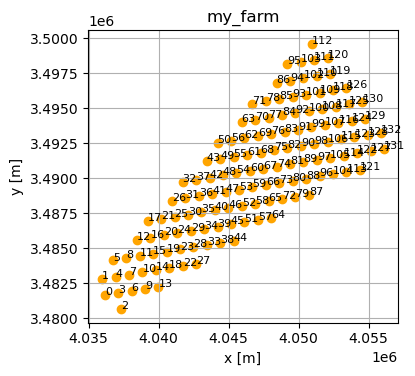

Calculating wind farm power for layout-N-9.1.geom.csv for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 103.62 ms
[########################################] | 100% Completed | 64.08 s
Efficiency added to farm results


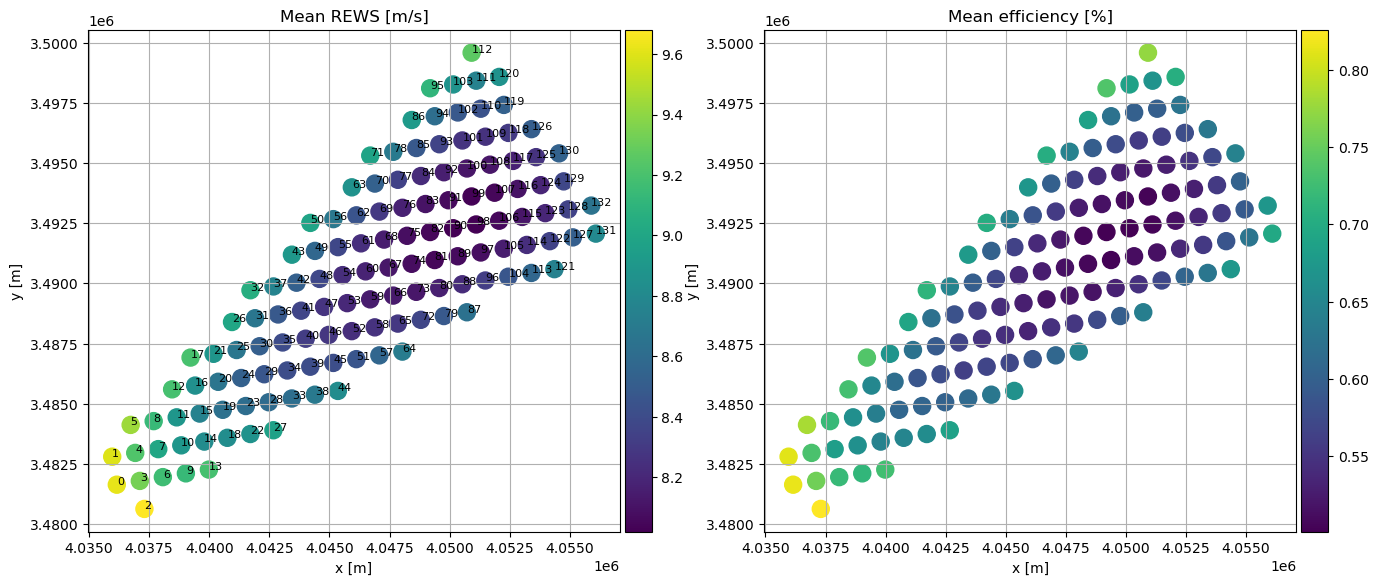

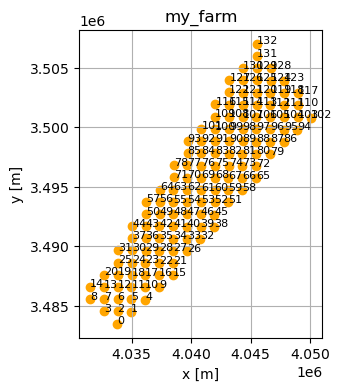

Calculating wind farm power for layout-N-9.2.geom.csv for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 103.83 ms
[########################################] | 100% Completed | 64.09 s
Efficiency added to farm results


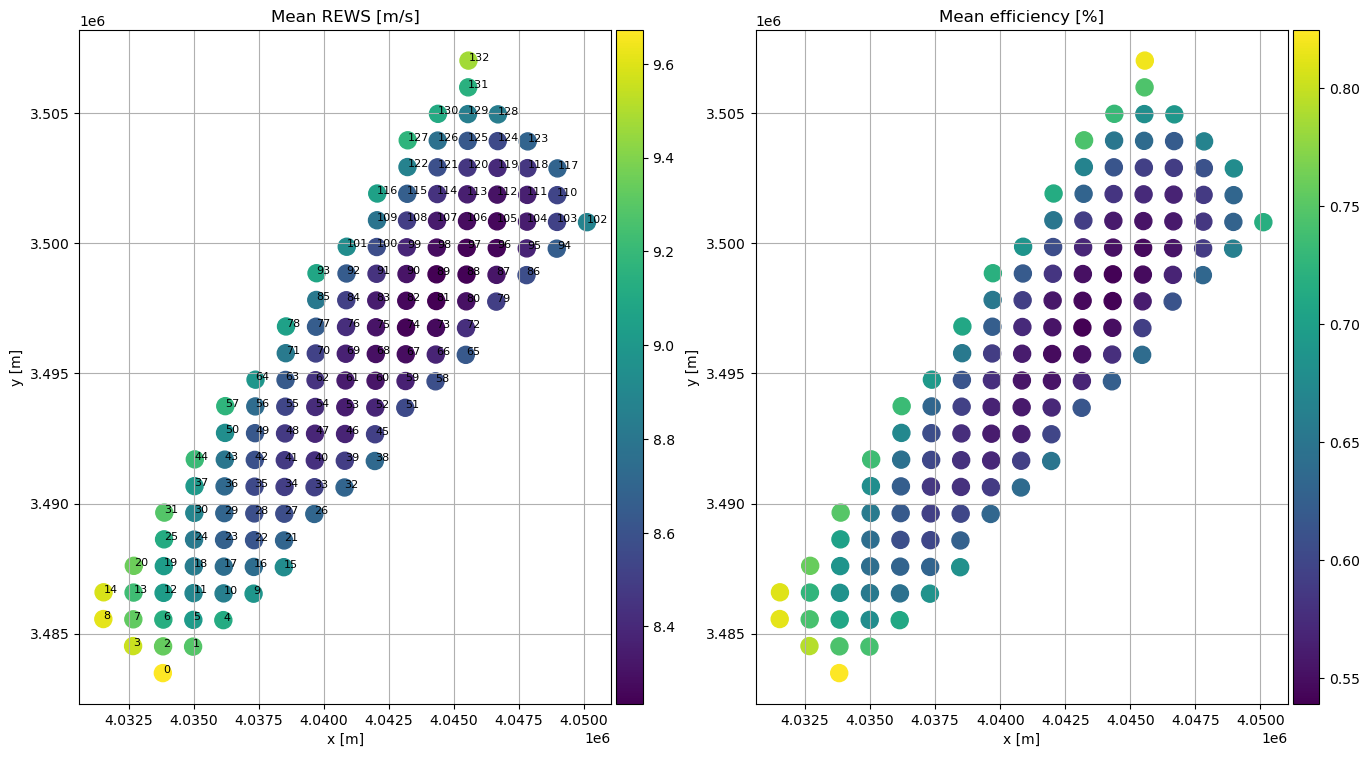

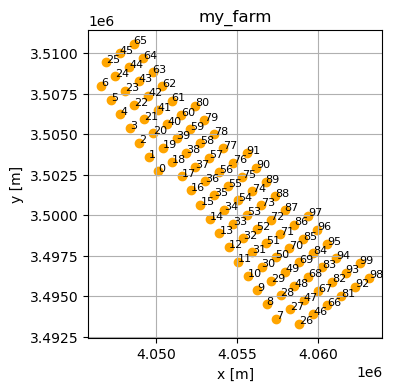

Calculating wind farm power for layout-N-9.3.geom.csv for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 103.93 ms
[########################################] | 100% Completed | 43.15 s
Efficiency added to farm results


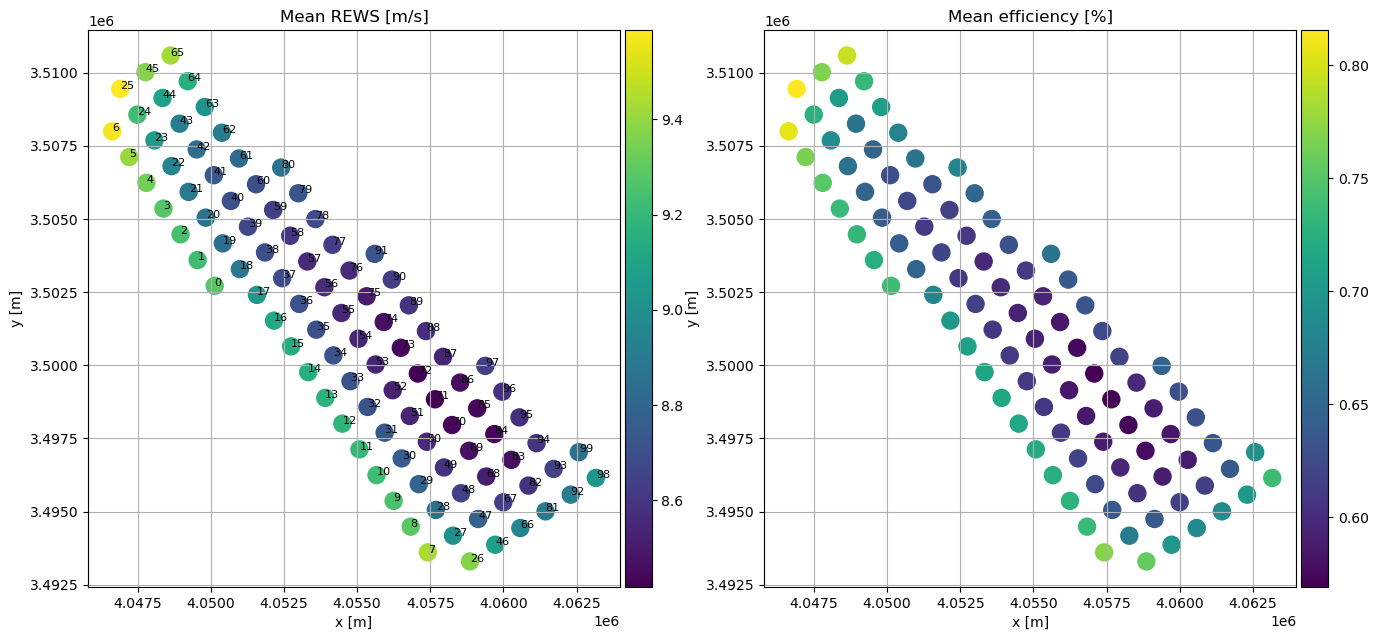

In [64]:

###-------------------------------------add Turbine Layouts----------------------------------###
# create 3 Dataframes for Turbine Layouts
current_path =  turbines_area_of_interest_path                           # path .csv's
turb_files = os.listdir(turbines_area_of_interest_path)
Turb_dfs = [(pd.read_csv(current_path + file),file) for file in turb_files]

#Load the coordinates of geo_layout
Areas = ['N-9.1','N-9.2','N-9.3'] 
Layout_Path = ["NoWake_Layout_" + area + ".csv" for area in Areas]
Layout_dfs = [pd.read_csv(file) for file in Layout_Path]  

#replace the coordinates of the turb_dfs with coordinates geolayout
for i, (turb_df, filename) in enumerate(Turb_dfs):
    layout_df = Layout_dfs[i]
    turb_df[['x', 'y']] = layout_df[['x', 'y']]
    Turb_dfs[i] = (turb_df, filename)

###----------------------------------------Add States-----------------------------------------###
States = foxes.input.states.Timeseries(                      
    data_source = data_2023 ,                                        
    output_vars = [FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col =     {FV.WS: "long-term_WS150", FV.WD: "long-term_WD150", FV.TI: "time"}, 
    fixed_vars =  {FV.RHO: 1.225, FV.TI: 0.05},                  
    )

###--------------------------------------Important Parameters---------------------------------------###
Parameters = dict(                              # passed to the foxes.algorithms.Downwind()
    TType         = "IEA15MW",                  #"NREL5MW","IEA15MW"
    rotor_model   = "centre",
    wake_models   = ["Bastankhah2014_linear"],
    partial_wakes = None,
    )

###--------------------------------------compute farm results--------------------------------------###
Farm_Results = []
for Farm in Turb_dfs:
    Farm_Results.append(Foxes_Farm_Power(Farm,States,Parameters))

In [65]:
results_N91 = Farm_Results[0][0]
results_N91_turbines = Farm_Results[0][1]
results_N92 = Farm_Results[1][0]
results_N92_turbines = Farm_Results[1][1]
results_N93 = Farm_Results[2][0]
results_N93_turbines = Farm_Results[2][1]

pd.options.display.float_format = '{:.2f}'.format
print(f'Results N91 only internal wakes: {results_N91}')
# print(f'Results N91 Turbines: {results_N91_turbines}')
print(f'Results N92 only internal wakes: {results_N92}')
# print(f'Results N92 Turbines: {results_N92_turbines}')
print(f'Results N93only internal wakes: {results_N93}')
# print(f'Results N93 Turbines: {results_N93_turbines}')


Results N91 only internal wakes:                        Farm power [MW]  Farm ambient power [MW]  \
layout-N-9.1.geom.csv           908.40                  1243.13   

                       Farm efficiency [%]  Annual farm yield [TWh]  
layout-N-9.1.geom.csv                73.07                     7.96  
Results N92 only internal wakes:                        Farm power [MW]  Farm ambient power [MW]  \
layout-N-9.2.geom.csv           938.04                  1243.13   

                       Farm efficiency [%]  Annual farm yield [TWh]  
layout-N-9.2.geom.csv                75.46                     8.22  
Results N93only internal wakes:                        Farm power [MW]  Farm ambient power [MW]  \
layout-N-9.3.geom.csv           723.08                   934.68   

                       Farm efficiency [%]  Annual farm yield [TWh]  
layout-N-9.3.geom.csv                77.36                     6.33  


In [66]:
# Function to group by time: year for now and calculate the mean
def group_month_and_calc_mean(df):
    df = df.copy()  # Ensure working with a copy of the DataFrame
    df.index = pd.to_datetime(df.index)
    df.loc[:, 'year'] = df.index.year  # Use .loc to avoid the SettingWithCopyWarning
    df_month_mean = df.groupby('year').mean()
    return df_month_mean

df_month_mean = group_month_and_calc_mean(data_2023)
df_month_mean

long-term_WS150  long-term_WD150
year                                  
2023            10.19           206.66

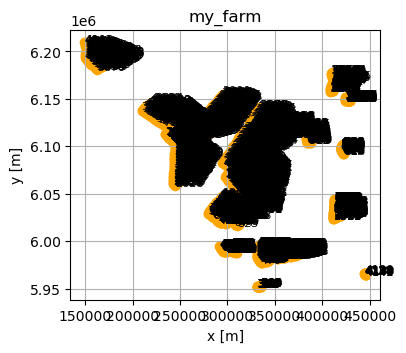

Calculating wind farm power for Combined_Cluster1 for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 101.71 ms
[########################################] | 100% Completed | 11.41 s
Efficiency added to farm results


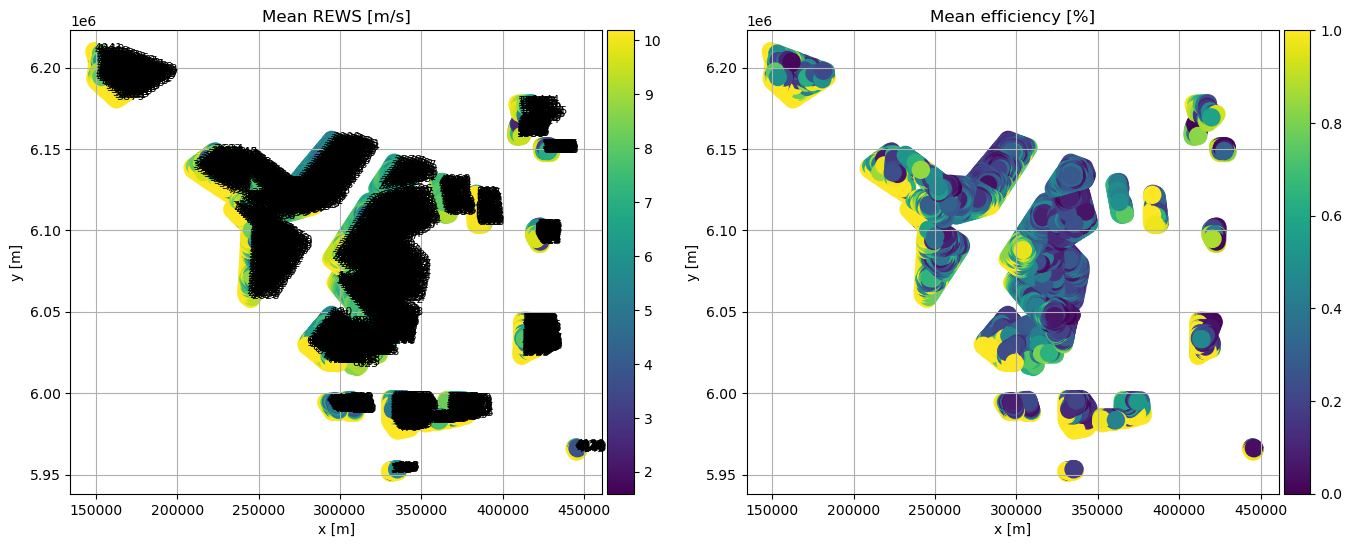

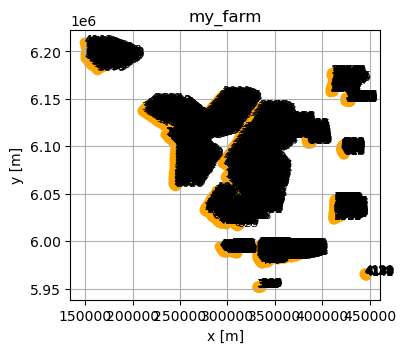

Calculating wind farm power for Combined_Cluster2 for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 102.29 ms
[########################################] | 100% Completed | 10.90 s
Efficiency added to farm results


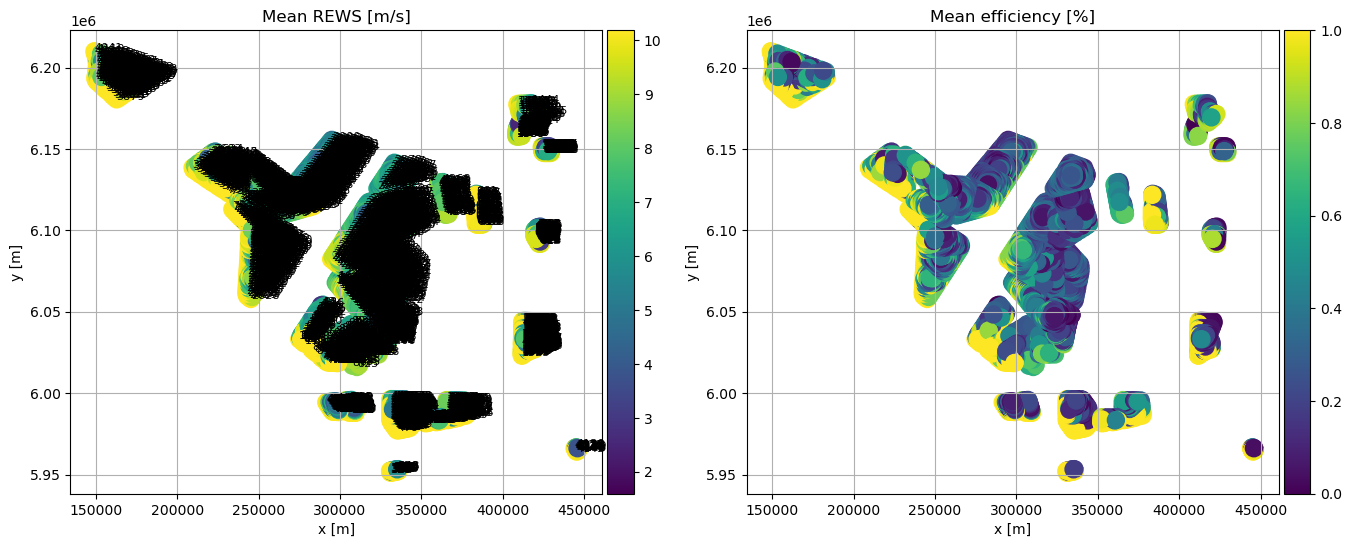

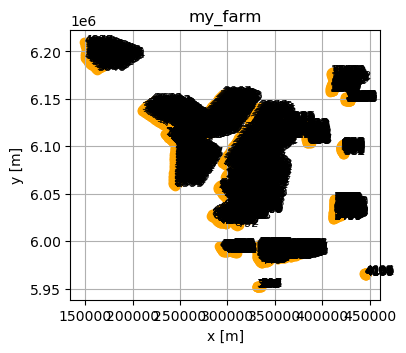

Calculating wind farm power for Combined_Cluster3 for Wake Model: ['Bastankhah2014_linear']:
[########################################] | 100% Completed | 103.89 ms
[########################################] | 100% Completed | 11.41 s
Efficiency added to farm results


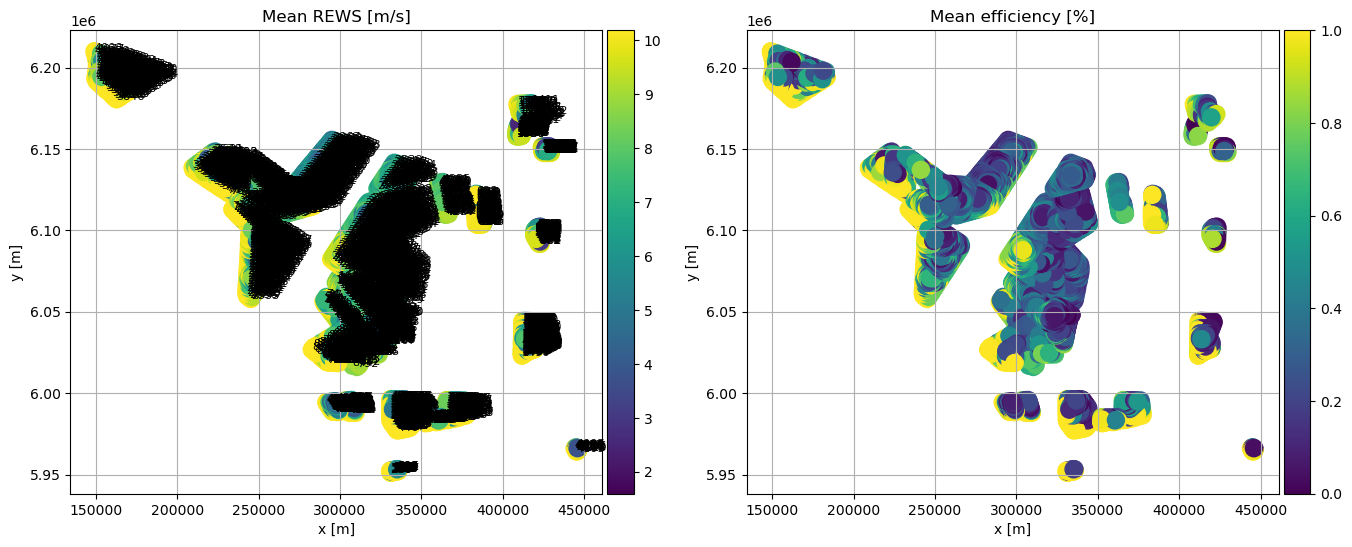

In [67]:
# Paths
turbines_area_of_interest_path = 'data/turbine-info/coordinates/area_of_interest/'
external_farms_path = 'data/turbine-info/coordinates/existing_planned/'

# Read internal turbine layout files
internal_files = os.listdir(turbines_area_of_interest_path) # List all files in the directory
Turb_dfs = [pd.read_csv(turbines_area_of_interest_path + file) for file in internal_files]

# Read external turbine layout files
external_files = os.listdir(external_farms_path)
external_dfs = [pd.read_csv(external_farms_path + file) for file in external_files]
external_combined_df = pd.concat(external_dfs, ignore_index=True)

# Combine internal and external layouts for wake effect calculation
Combined_Turb_dfs = []
for i in range(len(Turb_dfs)):
    combined_df = pd.concat([Turb_dfs[i], external_combined_df], ignore_index=True)
    Combined_Turb_dfs.append((combined_df, f"Combined_Cluster{i+1}"))

# Define States using a valid data source
States = foxes.input.states.Timeseries(
    data_source= df_month_mean,
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col={FV.WS: "long-term_WS150", FV.WD: "long-term_WD150", FV.TI: "time"},
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

# Define Parameters
Parameters = {
    'TType': "IEA15MW",
    'rotor_model': "centre",
    'wake_models': ["Bastankhah2014_linear"],
    'partial_wakes': None,
}

# Calculate the farm results with wake effects
combined_results = []
for Combined_Turb_df in Combined_Turb_dfs:
    result = Foxes_Farm_Power(Combined_Turb_df, States, Parameters)
    combined_results.append(result)


In [70]:
# Cluster labels
cluster_labels = ['N9_1', 'N9_2', 'N9_3']

# Load total farm yield without wakes
total_farmyield_nowakes = pd.read_csv('total_farmyield_nowakes_original.csv')
yield_no_wakes = [total_farmyield_nowakes.loc[0, f'yield_{label}'] for label in cluster_labels]

# Initialize results list
results = []

# Process and print the results
for i, combined_result in enumerate(combined_results):
    summary_results, turbine_results = combined_result
    
    # Extract the results for the farm of interest (Turb_df)
    matched_turbines = turbine_results.merge(Turb_dfs[i], left_on=['X', 'Y'], right_on=['x', 'y'])
    matched_turbines = matched_turbines.drop(['x', 'y'], axis=1)
    
    # Calculate the annual farm yield
    farm_yield = (matched_turbines['YLD'].sum()) / 1000  # Convert to TWh
    
    results.append({
        'Cluster': cluster_labels[i],
        'Scenario': 'internal + external wakes',
        'Yield (TWh)': farm_yield
    })

# Reset results for internal wakes
results_N91_reset = results_N91.reset_index(drop=True)
results_N92_reset = results_N92.reset_index(drop=True)
results_N93_reset = results_N93.reset_index(drop=True)

# Extract yields for internal wakes
yield_internal_wakes = [
    results_N91_reset.loc[0, 'Annual farm yield [TWh]'],
    results_N92_reset.loc[0, 'Annual farm yield [TWh]'],
    results_N93_reset.loc[0, 'Annual farm yield [TWh]']
]

# Add yields to results list
for i, yield_value in enumerate(yield_internal_wakes):
    results.append({
        'Cluster': f'N9_{i+1}',
        'Scenario': 'internal wakes',
        'Yield (TWh)': yield_value
    })

for i, yield_value in enumerate(yield_no_wakes):
    results.append({
        'Cluster': f'N9_{i+1}',
        'Scenario': 'no wakes',
        'Yield (TWh)': yield_value
    })

# Create a dictionary for no wakes yields
no_wakes_dict = {f'N9_{i+1}': yield_no_wakes[i] for i in range(len(cluster_labels))}

# Calculate percentages and update results
for result in results:
    cluster = result['Cluster']
    scenario = result['Scenario']
    yield_value = result['Yield (TWh)']
    if scenario != 'no wakes':
        no_wakes_yield = no_wakes_dict[cluster]
        percentage = (yield_value / no_wakes_yield) * 100
        result['Percentage of no wakes'] = percentage
    else:
        result['Percentage of no wakes'] = 100

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Save results to CSV
results_df.to_csv('farm_yields.csv', index=False)

# Print all results
for result in results:
    print(f"{result['Cluster']} - {result['Scenario']}: {result['Yield (TWh)']:.2f} TWh ({result['Percentage of no wakes']:.2f}%)")


N9_1 - internal + external wakes: 5.48 TWh (48.34%)
N9_2 - internal + external wakes: 6.10 TWh (53.82%)
N9_3 - internal + external wakes: 5.83 TWh (68.35%)
N9_1 - internal wakes: 7.96 TWh (70.17%)
N9_2 - internal wakes: 8.22 TWh (72.46%)
N9_3 - internal wakes: 6.33 TWh (74.29%)
N9_1 - no wakes: 11.34 TWh (100.00%)
N9_2 - no wakes: 11.34 TWh (100.00%)
N9_3 - no wakes: 8.53 TWh (100.00%)


In [71]:
results_df

Cluster                   Scenario  Yield (TWh)  Percentage of no wakes
0    N9_1  internal + external wakes         5.48                   48.34
1    N9_2  internal + external wakes         6.10                   53.82
2    N9_3  internal + external wakes         5.83                   68.35
3    N9_1             internal wakes         7.96                   70.17
4    N9_2             internal wakes         8.22                   72.46
5    N9_3             internal wakes         6.33                   74.29
6    N9_1                   no wakes        11.34                  100.00
7    N9_2                   no wakes        11.34                  100.00
8    N9_3                   no wakes         8.53                  100.00